## sgRNA library stats

In [51]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import os
import scanpy as sc
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from preprocess import _process_cellranger, get_sgrna_qc_metrics

In [53]:
# Read config
config_file = '../../metadata/experiments_config.yaml'
with open(config_file, 'r') as f:
    config = yaml.safe_load(f)

In [108]:
os.listdir(datadir)

['PilotD2Redo_Restim24hr.sgRNA.h5ad',
 'PilotD2Redo_Restim6hr.sgRNA.h5ad',
 'PilotD2Redo_Rest.sgRNA.h5ad',
 'PilotD2Redo_Day7.sgRNA.h5ad',
 'PilotD2Redo_merged.gex.lognorm.h5ad',
 'tmp',
 'cellranger_outs']

In [143]:
experiment = 'PilotD2Redo'
datadir = config[experiment]['datadir']
if not os.path.exists(datadir):
    datadir = datadir.replace('/oak/stanford/groups/pritch/', '/mnt/oak/')
sample_metadata_csv = config[experiment]['sample_metadata']
if not os.path.exists(sample_metadata_csv):
    sample_metadata_csv = sample_metadata_csv.replace('/oak/stanford/groups/pritch/', '/mnt/oak/')

# List all sgRNA h5ad files
sgRNA_files = [f for f in os.listdir(datadir) if f.endswith('.sgRNA.h5ad')]

adata = sc.read_h5ad(datadir + 'PilotD2Redo_merged.gex.lognorm.h5ad')
cells_qc = adata.obs[['n_genes_by_counts', 'pct_counts_mt', 'total_counts']].copy()

a_ls = []
for f in sgRNA_files:
    crispr_a = sc.read_h5ad(datadir + f)
    crispr_a.var = crispr_a.var[['feature_types', 'genome', 'pattern', 'read', 'sequence']]
    get_sgrna_qc_metrics(crispr_a)
    crispr_a.obs = crispr_a.obs[['sample_id']]
    # Add scRNAseq QC
    crispr_a.obs = pd.merge(crispr_a.obs.reset_index(), cells_qc.reset_index(), how='left').set_index('index')
    crispr_a.obs[cells_qc.columns] = crispr_a.obs[cells_qc.columns].fillna(0)
    a_ls.append(crispr_a)

In [144]:
crispr_a

AnnData object with n_obs × n_vars = 76404 × 27272
    obs: 'sample_id', 'n_genes_by_counts', 'pct_counts_mt', 'total_counts'
    var: 'sgrna_id', 'perturbed_gene_name', 'perturbation_type', 'sgrna_type', 'feature_types', 'genome', 'pattern', 'read', 'sequence', 'n_cells', 'mean_counts', 'total_counts', 'nonz_means'

sample_id  \
AAACAAGCAAACCGGTATACGTCA-1_PilotD2Redo_Restim24hr  PilotD2Redo_Restim24hr   
AAACAAGCAAATCACGATTCGGTT-1_PilotD2Redo_Restim24hr  PilotD2Redo_Restim24hr   
AAACAAGCAACAAAGAATCATGTG-1_PilotD2Redo_Restim24hr  PilotD2Redo_Restim24hr   
AAACAAGCAACAGAGGATACGTCA-1_PilotD2Redo_Restim24hr  PilotD2Redo_Restim24hr   
AAACAAGCAACATGATATACGTCA-1_PilotD2Redo_Restim24hr  PilotD2Redo_Restim24hr   
...                                                                   ...   
TTTGTGAGTTGTCAGTATCATGTG-1_PilotD2Redo_Restim24hr  PilotD2Redo_Restim24hr   
TTTGTGAGTTGTTCCCATTCGGTT-1_PilotD2Redo_Restim24hr  PilotD2Redo_Restim24hr   
TTTGTGAGTTGTTTGAATTCGGTT-1_PilotD2Redo_Restim24hr  PilotD2Redo_Restim24hr   
TTTGTGAGTTTATCGAAACGCCGA-1_PilotD2Redo_Restim24hr  PilotD2Redo_Restim24hr   
TTTGTGAGTTTCCTCAATACGTCA-1_PilotD2Redo_Restim24hr  PilotD2Redo_Restim24hr   

                                                   n_genes_by_counts  \
AAACAAGCAAACCGGTATACGTCA-1_PilotD2Redo_Restim24hr                5.0   
AAACAAGCAAATCACGATTCGGTT-1_PilotD2Redo_Restim24hr               10.0   
AAACAAGCAACAAAGAATCATGTG-1_PilotD2Redo_Restim24hr                3.0   
AAACAAGCAACAGAGGATACGTCA-1_PilotD2Redo_Restim24hr                5.0   
AAACAAGCAACATGATATACGTCA-1_PilotD2Redo_Restim24hr                3.0   
...                                                              ...   
TTTGTGAGTTGTCAGTATCATGTG-1_PilotD2Redo_Restim24hr                7.0   
TTTGTGAGTTGTTCCCATTCGGTT-1_PilotD2Redo_Restim24hr                6.0   
TTTGTGAGTTGTTTGAATTCGGTT-1_PilotD2Redo_Restim24hr                5.0   
TTTGTGAGTTTATCGAAACGCCGA-1_PilotD2Redo_Restim24hr                2.0   
TTTGTGAGTTTCCTCAATACGTCA-1_PilotD2Redo_Restim24hr                5.0   

                                                   log1p_n_genes_by_counts  \
AAACAAGCAAACCGGTATACGTCA-1_PilotD2Redo_Restim24hr                 1.791759   
AAACAAGCAAATCACGATTCGGTT-1_PilotD2Redo_Restim24hr                 2.397895   
AAACAAGCAACAAAGAATCATGTG-1_PilotD2Redo_Restim24hr                 1.386294   
AAACAAGCAACAGAGGATACGTCA-1_PilotD2Redo_Restim24hr                 1.791759   
AAACAAGCAACATGATATACGTCA-1_PilotD2Redo_Restim24hr                 1.386294   
...                                                                    ...   
TTTGTGAGTTGTCAGTATCATGTG-1_PilotD2Redo_Restim24hr                 2.079442   
TTTGTGAGTTGTTCCCATTCGGTT-1_PilotD2Redo_Restim24hr                 1.945910   
TTTGTGAGTTGTTTGAATTCGGTT-1_PilotD2Redo_Restim24hr                 1.791759   
TTTGTGAGTTTATCGAAACGCCGA-1_PilotD2Redo_Restim24hr                 1.098612   
TTTGTGAGTTTCCTCAATACGTCA-1_PilotD2Redo_Restim24hr                 1.791759   

                                                   total_counts  \
AAACAAGCAAACCGGTATACGTCA-1_PilotD2Redo_Restim24hr          17.0   
AAACAAGCAAATCACGATTCGGTT-1_PilotD2Redo_Restim24hr         142.0   
AAACAAGCAACAAAGAATCATGTG-1_PilotD2Redo_Restim24hr          71.0   
AAACAAGCAACAGAGGATACGTCA-1_PilotD2Redo_Restim24hr           5.0   
AAACAAGCAACATGATATACGTCA-1_PilotD2Redo_Restim24hr         600.0   
...                                                         ...   
TTTGTGAGTTGTCAGTATCATGTG-1_PilotD2Redo_Restim24hr          52.0   
TTTGTGAGTTGTTCCCATTCGGTT-1_PilotD2Redo_Restim24hr           6.0   
TTTGTGAGTTGTTTGAATTCGGTT-1_PilotD2Redo_Restim24hr         375.0   
TTTGTGAGTTTATCGAAACGCCGA-1_PilotD2Redo_Restim24hr           2.0   
TTTGTGAGTTTCCTCAATACGTCA-1_PilotD2Redo_Restim24hr          11.0   

                                                   log1p_total_counts  \
AAACAAGCAAACCGGTATACGTCA-1_PilotD2Redo_Restim24hr            2.890372   
AAACAAGCAAATCACGATTCGGTT-1_PilotD2Redo_Restim24hr            4.962845   
AAACAAGCAACAAAGAATCATGTG-1_PilotD2Redo_Restim24hr            4.276666   
AAACAAGCAACAGAGGATACGTCA-1_PilotD2Redo_Restim24hr            1.791759   
AAACAAGCAACATGATATACGTCA-1_PilotD2Redo_Restim24hr            6.398595   
...                                                               ...   
TTTGTGAGTTGTCAGTATCAT

In [248]:
def plot_sgrna_stats(adata, figsize=(12, 12)):
    # Create figure with a similar layout
    fig = plt.figure(figsize=figsize)
    gs = plt.GridSpec(2, 2, width_ratios=[3, 1], height_ratios=[1, 3])
    
    # Extract data
    x = adata.var['n_cells']  # number of cells with sgRNA
    y = adata.var['nonz_means']  # non-zero means
    sgrna_types = adata.var['sgrna_type']

    # Create color mapping
    colors = {'Targeting': 'gray', 'NTC': 'blue', 'ProbeNTC': 'red'}
    c = [colors.get(t, 'gray') for t in sgrna_types]
    
    # Calculate mean and std for targeting guides
    targeting_mask = sgrna_types == 'targeting'
    targeting_mean = x[targeting_mask].mean()
    targeting_std = x[targeting_mask].std()
    print(targeting_std)
    
    # Top histogram
    ax_top = fig.add_subplot(gs[0, 0])
    for stype in ['Targeting', 'NTC', 'ProbeNTC']:
        mask = sgrna_types == stype
        ax_top.hist(x[mask], bins=np.logspace(0, 3, 50),
                   color=colors[stype], alpha=0.6, label=stype)
    # Add vertical lines for mean and ±2SE
    ax_top.axvline(targeting_mean, color='black', linestyle='-', alpha=0.5)
    # ax_top.axvline(targeting_mean - 1*targeting_std, color='black', linestyle='--', alpha=0.5)
    # ax_top.axvline(targeting_mean + *targeting_std, color='black', linestyle='--', alpha=0.5)
    ax_top.set_xscale('log')
    ax_top.set_yscale('linear')
    ax_top.set_xlim(1, 1e3)
    ax_top.set_ylabel('Count')
    ax_top.set_xticks([])
    
    # Main scatter plot
    ax_main = fig.add_subplot(gs[1, 0])
    ax_main.scatter(x, y, c=c, alpha=0.5, s=5)
    # Add vertical lines for mean and ±2SE
    # ax_main.axvline(targeting_mean, color='black', linestyle='-', alpha=0.5, label='Mean')
    # ax_main.axvline(targeting_mean - 2*targeting_std, color='black', linestyle='--', alpha=0.5, label='Mean ± 2SE')
    ax_main.axvline(5, color='black', linestyle='--', alpha=1)
    ax_main.axvline(100, color='black', linestyle='--', alpha=1, label='Mean')
    ax_main.axhline(5, color='black', linestyle='--', alpha=1, label='Mean')
    ax_main.set_xscale('log')
    ax_main.set_yscale('log')
    ax_main.set_xlabel('# cells with sgRNA')
    ax_main.set_ylabel('Non-zero means sgRNA counts')
    ax_main.set_xlim(1, 1e3)
    ax_main.set_ylim(1, 1e3)
    
    # Right histogram
    ax_right = fig.add_subplot(gs[1, 1])
    for stype in ['Targeting', 'NTC', 'ProbeNTC']:
        mask = sgrna_types == stype
        ax_right.hist(y[mask], bins=np.logspace(0, 3, 50),
                     orientation='horizontal', color=colors[stype],
                     alpha=0.6)
    ax_right.set_yscale('log')
    ax_right.set_ylim(1, 1e3)
    ax_right.set_yticks([])
    
    # Legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', 
                         markerfacecolor=colors[label], label=label,
                         markersize=8) 
              for label in ['Targeting', 'NTC', 'ProbeNTC']]
    # Add lines to legend
    handles.extend([
        plt.Line2D([0], [0], color='black', linestyle='-', label='Mean'),
        plt.Line2D([0], [0], color='black', linestyle='--', label='Mean ± 2SE')
    ])
    ax_main.legend(handles=handles, loc='upper right')
    
    # Adjust layout
    plt.tight_layout()
    return fig

21.6750686324237


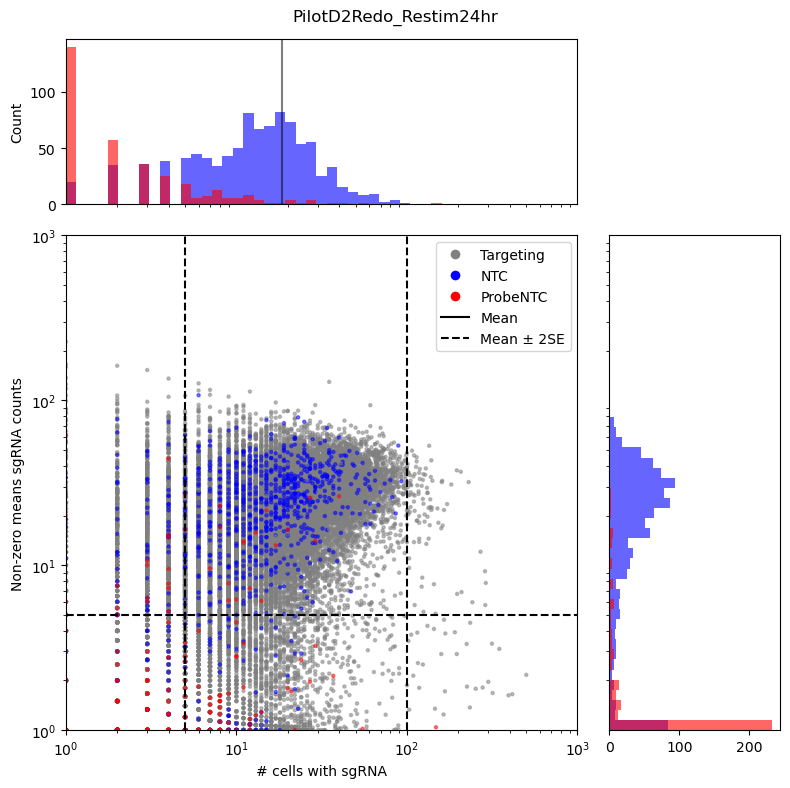

26.424444343704128


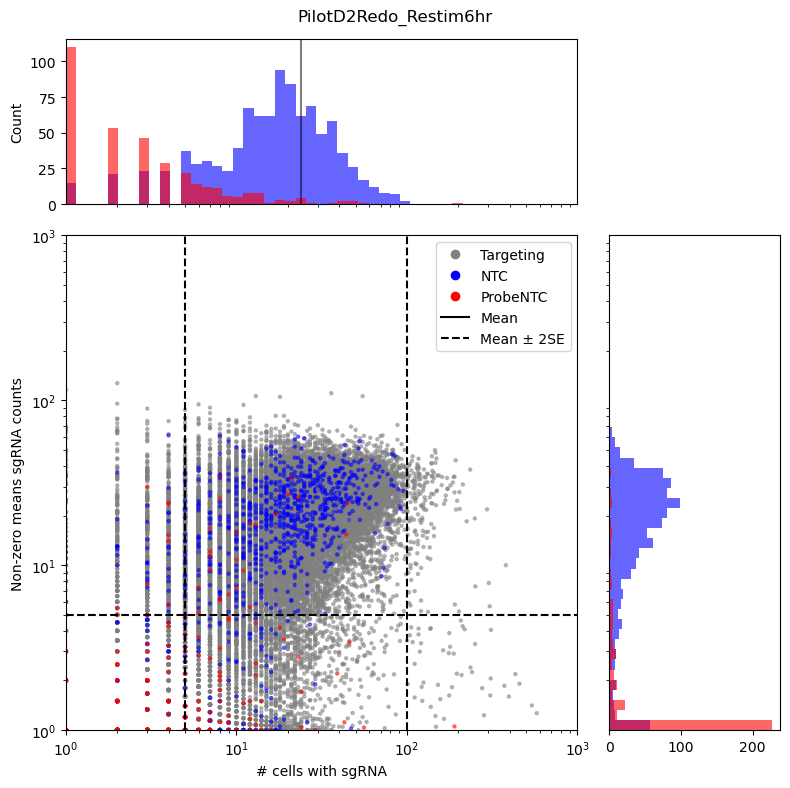

22.50858015212679


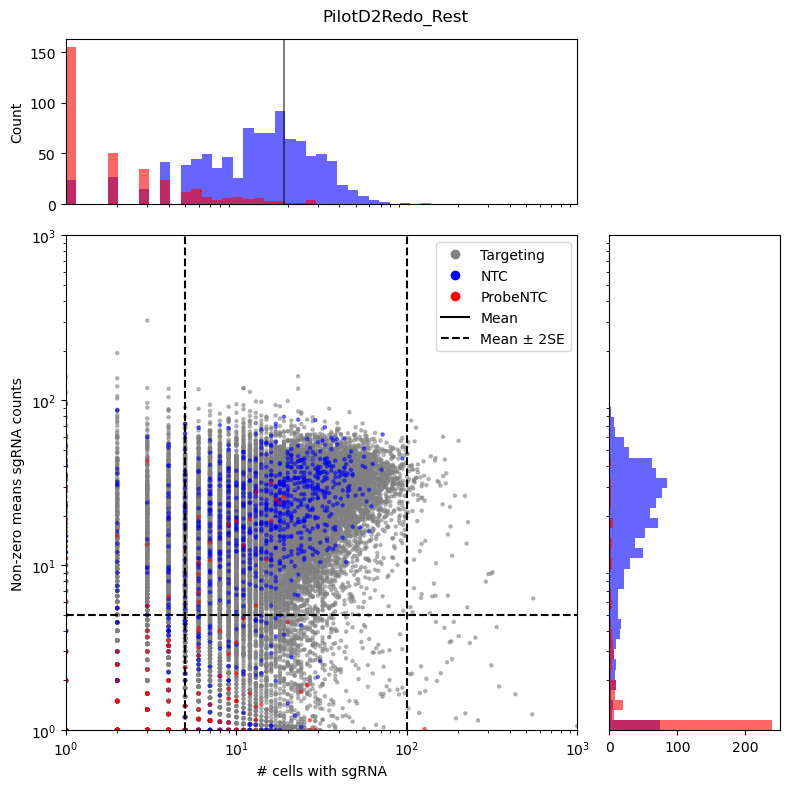

54.85024690574934


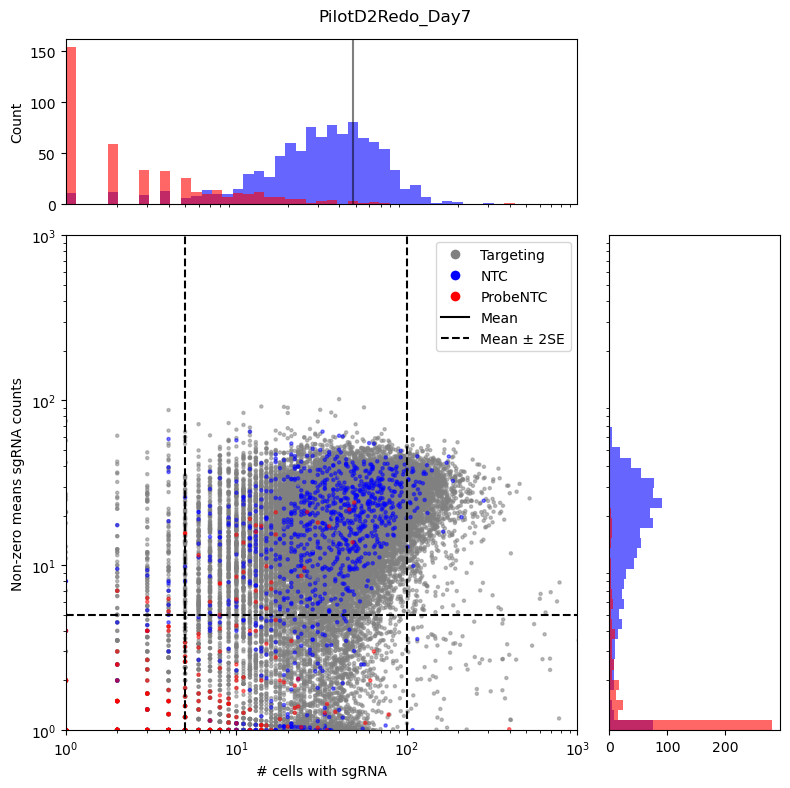

In [255]:
for a in a_ls:
    fig = plot_sgrna_stats(a, figsize=(8,8))
    a.var['inefficient'] = (a.var['nonz_means'] < 5) & ((a.var['n_cells'] > 5) & (a.var['n_cells'] < 100))
    fig.suptitle(a.obs['sample_id'][0])
    plt.tight_layout()
    plt.show()


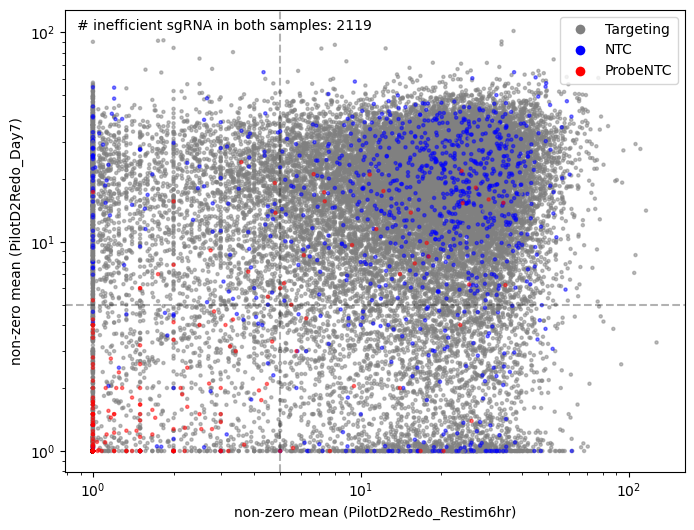

In [243]:
i1, i2 = 1,3
# Set up colors
colors = {'Targeting': 'grey', 'NTC': 'blue', 'ProbeNTC': 'red'}

# Get sgRNA types
sgrna_types = a_ls[1].var['sgrna_type'].values
c = [colors.get(t, 'gray') for t in sgrna_types]

plt.figure(figsize=(8,6))
plt.scatter(
    a_ls[i1].var['nonz_means'],
    a_ls[i2].var['nonz_means'],
    s=5, alpha=0.5, c=c)
plt.xscale('log');
plt.yscale('log');
plt.xlabel(f'non-zero mean ({a_ls[i1].obs["sample_id"].unique()[0]})');
plt.ylabel(f'non-zero mean ({a_ls[i2].obs["sample_id"].unique()[0]})');
# Add threshold lines
threshold = 5
plt.axhline(y=threshold, color='black', linestyle='--', alpha=0.3)
plt.axvline(x=threshold, color='black', linestyle='--', alpha=0.3)

# Calculate points below threshold
x_vals = (a_ls[i1].var['nonz_means']).fillna(0)
y_vals = (a_ls[i2].var['nonz_means']).fillna(0)
below_threshold = (x_vals < threshold) & (y_vals < threshold)
n_below = below_threshold.sum()

# Add annotation
plt.text(0.02, 0.98, f'# inefficient sgRNA in both samples: {n_below}', 
         transform=plt.gca().transAxes, 
         verticalalignment='top')

# Add legend
handles = [plt.Line2D([0], [0], marker='o', color='w',
                     markerfacecolor=colors[label], label=label,
                     markersize=8)
          for label in ['Targeting', 'NTC', 'ProbeNTC']]
plt.legend(handles=handles, loc='upper right')

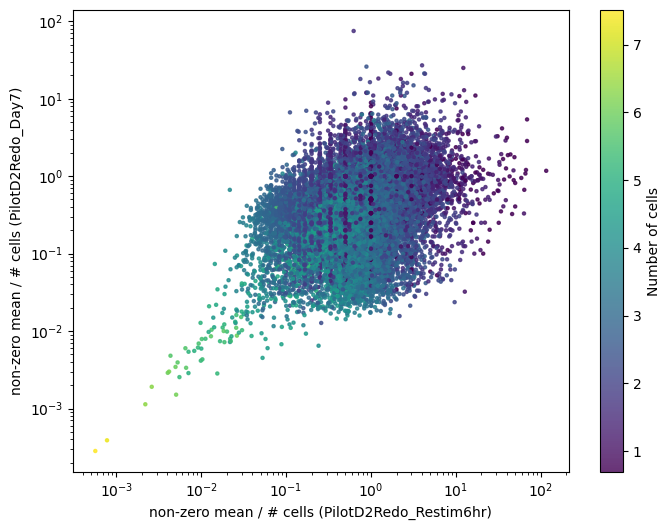

In [265]:
i1, i2 = 1,3
# Set up colors
# colors = {'Targeting': 'grey', 'NTC': 'blue', 'ProbeNTC': 'red'}

# # Get sgRNA types
# sgrna_types = a_ls[1].var['sgrna_type'].values
# c = [colors.get(t, 'gray') for t in sgrna_types]


plt.figure(figsize=(8,6))
scatter = plt.scatter(
    a_ls[i1].var['nonz_means']/a_ls[i1].var['n_cells'],
    a_ls[i2].var['nonz_means']/a_ls[i2].var['n_cells'],
    s=5, alpha=0.8,
    c=np.log1p(a_ls[i1].var['n_cells']),
    cmap='viridis')
plt.colorbar(scatter, label='Number of cells')
plt.xscale('log');
plt.yscale('log');
plt.xlabel(f'non-zero mean / # cells ({a_ls[i1].obs["sample_id"].unique()[0]})');
plt.ylabel(f'non-zero mean / # cells ({a_ls[i2].obs["sample_id"].unique()[0]})');
# # Add threshold lines
# threshold = 0.2
# plt.axhline(y=threshold, color='black', linestyle='--', alpha=0.3)
# plt.axvline(x=threshold, color='black', linestyle='--', alpha=0.3)

# # Calculate points below threshold
# x_vals = (a_ls[i1].var['nonz_means']/a_ls[i1].var['n_cells']).fillna(0)
# y_vals = (a_ls[i2].var['nonz_means']/a_ls[i2].var['n_cells']).fillna(0)
# below_threshold = (x_vals < threshold) & (y_vals < threshold)
# n_below = below_threshold.sum()

# # Add annotation
# plt.text(0.02, 0.98, f'# inefficient sgRNA in both samples: {n_below}', 
#          transform=plt.gca().transAxes, 
#          verticalalignment='top')

# Add legend
# handles = [plt.Line2D([0], [0], marker='o', color='w',
#                      markerfacecolor=colors[label], label=label,
#                      markersize=8)
#           for label in ['Targeting', 'NTC', 'ProbeNTC']]
# plt.legend(handles=handles, loc='upper right')

In [273]:
inefficient_sgrnas = pd.concat([a.var['inefficient'] for a in a_ls], axis=1, keys=[a.obs['sample_id'][0] for a in a_ls])
inefficient_sgrnas.sum(1).sort_values(ascending=False)[0:1000]

TIMM13-2        4
ProbeNTC-612    4
COMMD7-1        4
PRRC2B-1        4
TTBK2-1         4
               ..
ZNF100-1        2
FAM208B-1       2
CLEC1B-2        2
SDHAF4-1        2
MED21-2         2
Length: 1000, dtype: int64

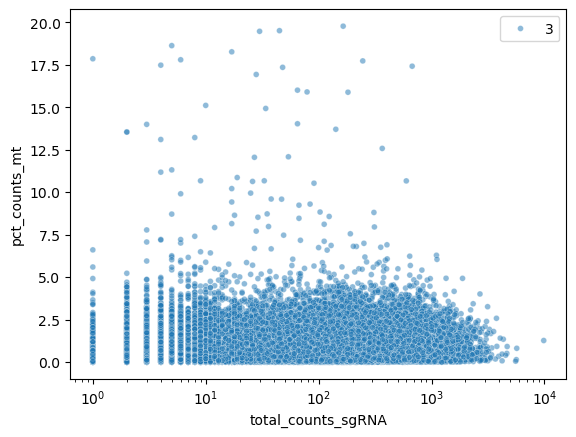

In [201]:
sns.scatterplot(data=crispr_a.obs, x='total_counts_sgRNA', y='pct_counts_mt', size=3, alpha=0.5);
plt.xscale('log');
# plt.yscale('log');

In [215]:
# Add threshold lines
threshold = 0.1
# Calculate points below threshold
x_vals = (a_ls[i1].var['nonz_means']/a_ls[i1].var['n_cells']).fillna(0)
y_vals = (a_ls[i2].var['nonz_means']/a_ls[i2].var['n_cells']).fillna(0)
below_threshold = (x_vals < threshold) & (y_vals < threshold)
n_below = below_threshold.sum()
sgrna_blacklist = below_threshold.index[below_threshold].tolist()
sgrna_blacklist = [x for x in sgrna_blacklist if not x.startswith("ProbeNTC-")]

In [216]:
crispr_a = a_ls[0].copy()

In [217]:
sgrna_qc = sc.get.obs_df(crispr_a, sgrna_blacklist + cells_qc.columns.tolist())

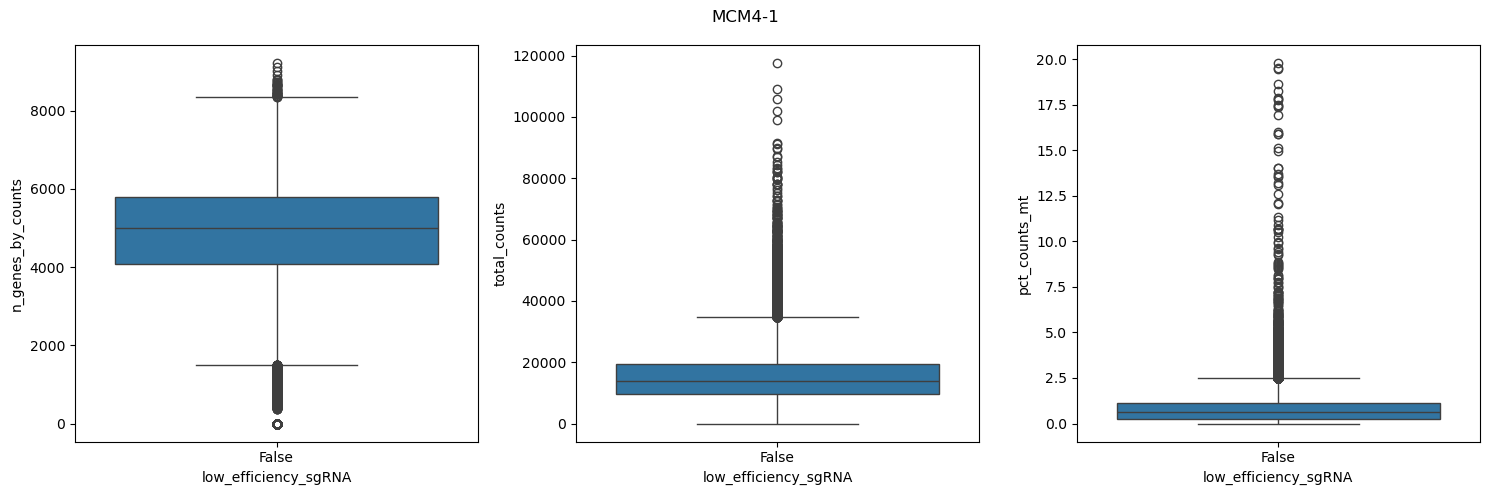

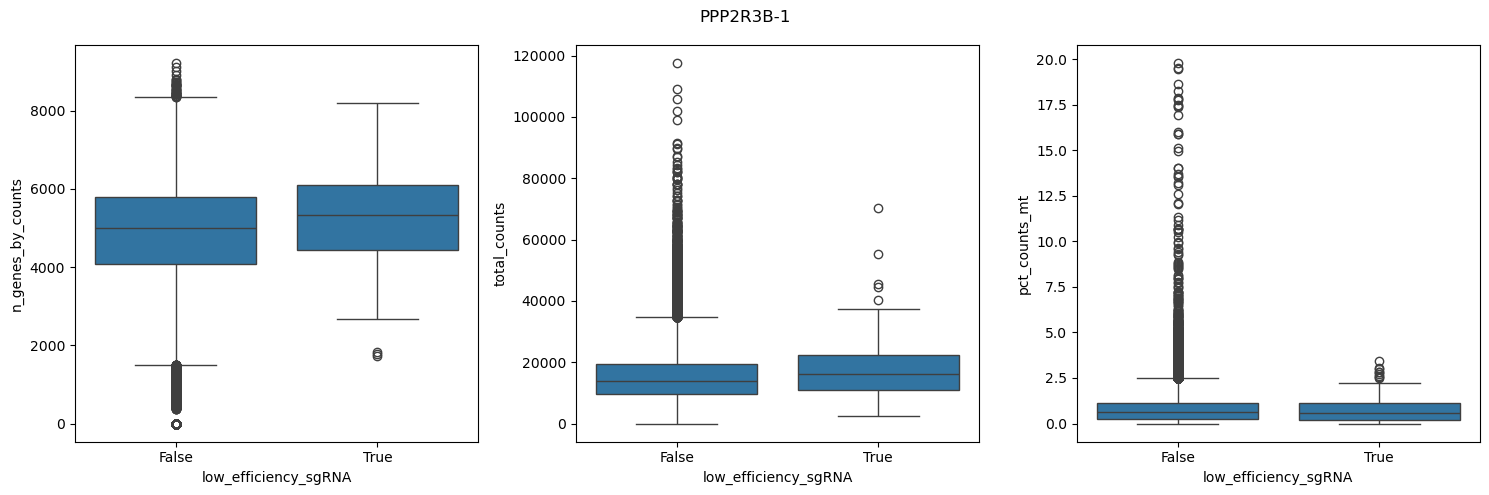

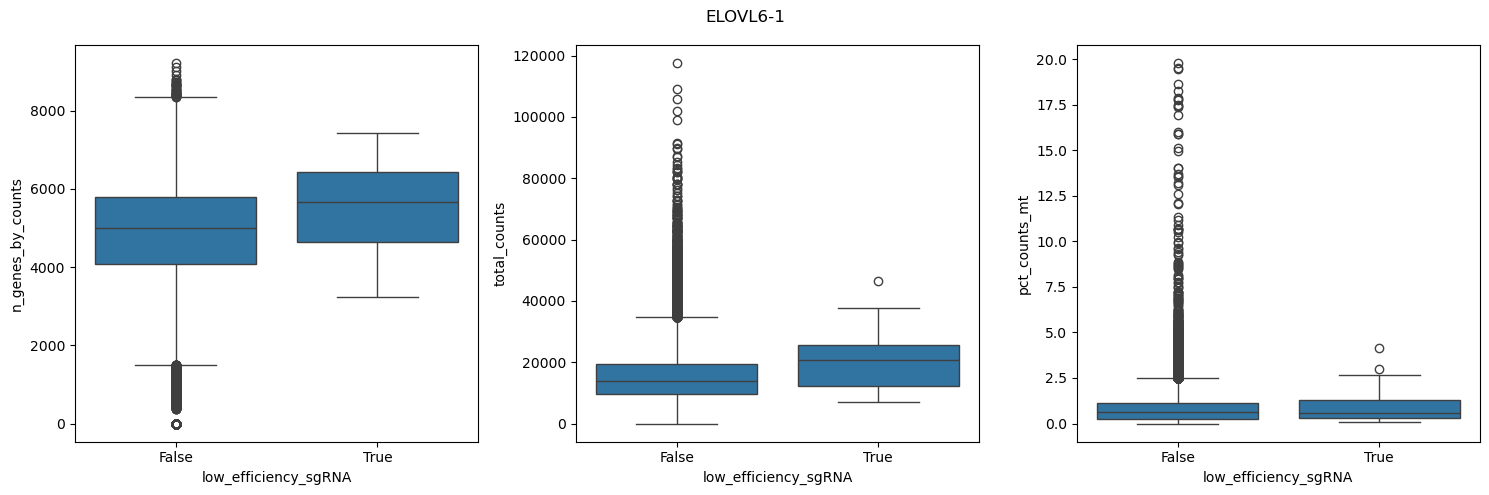

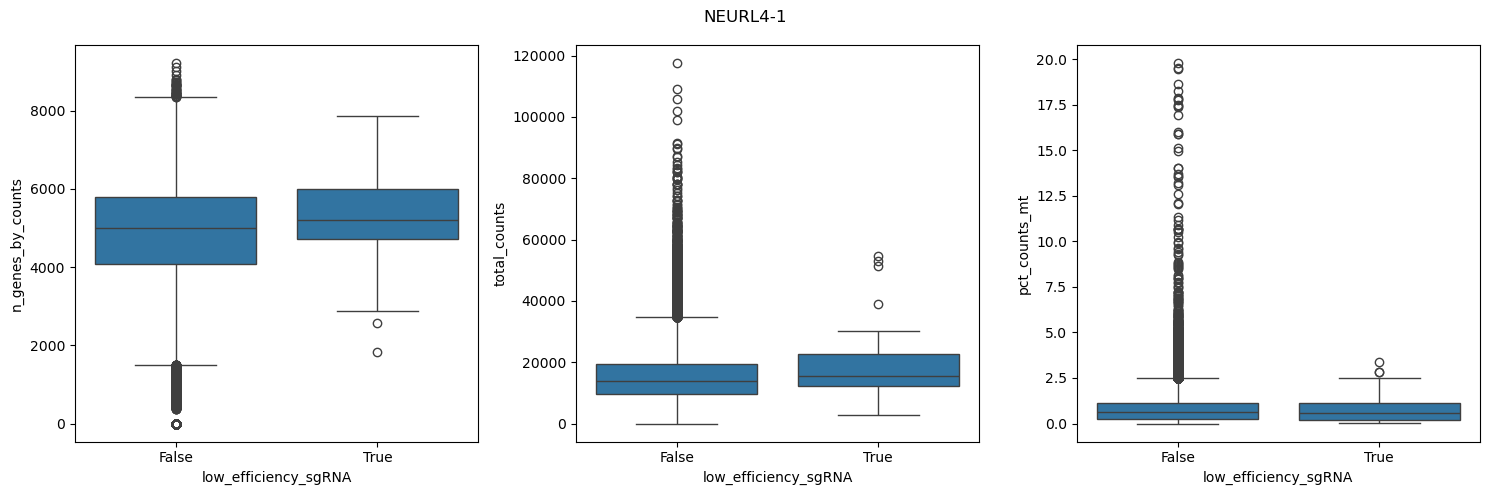

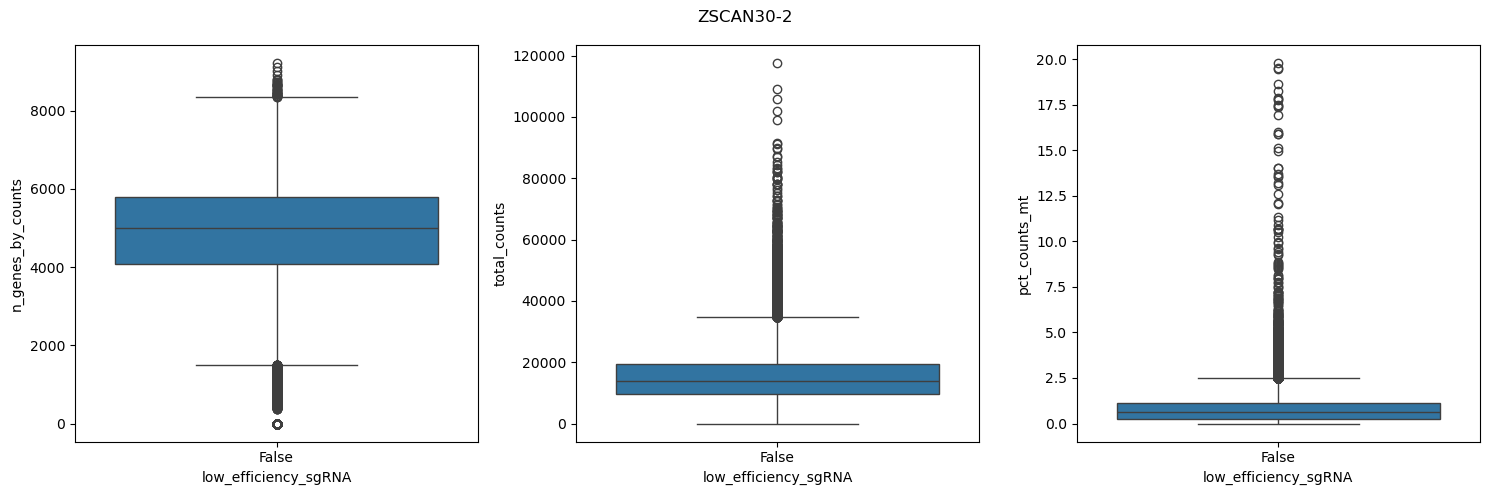

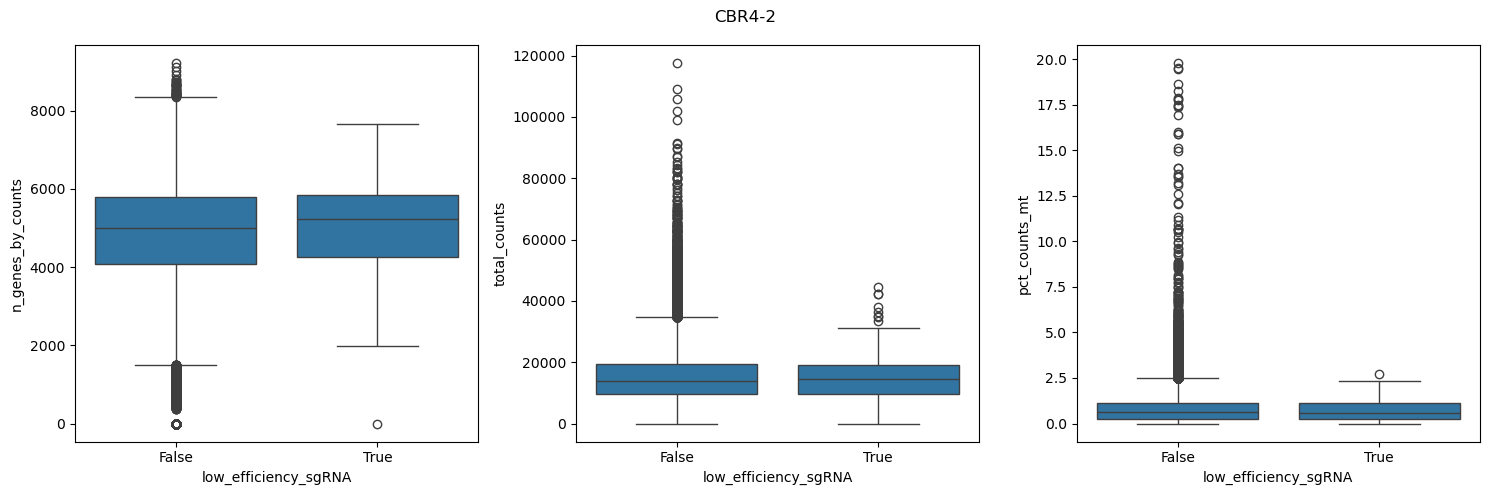

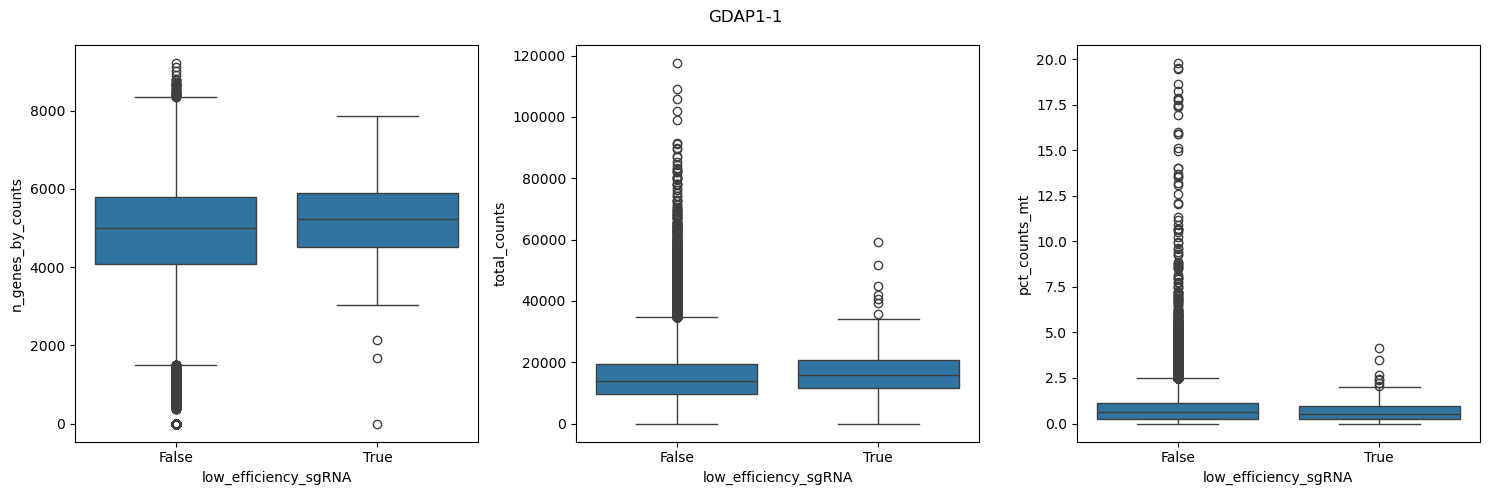

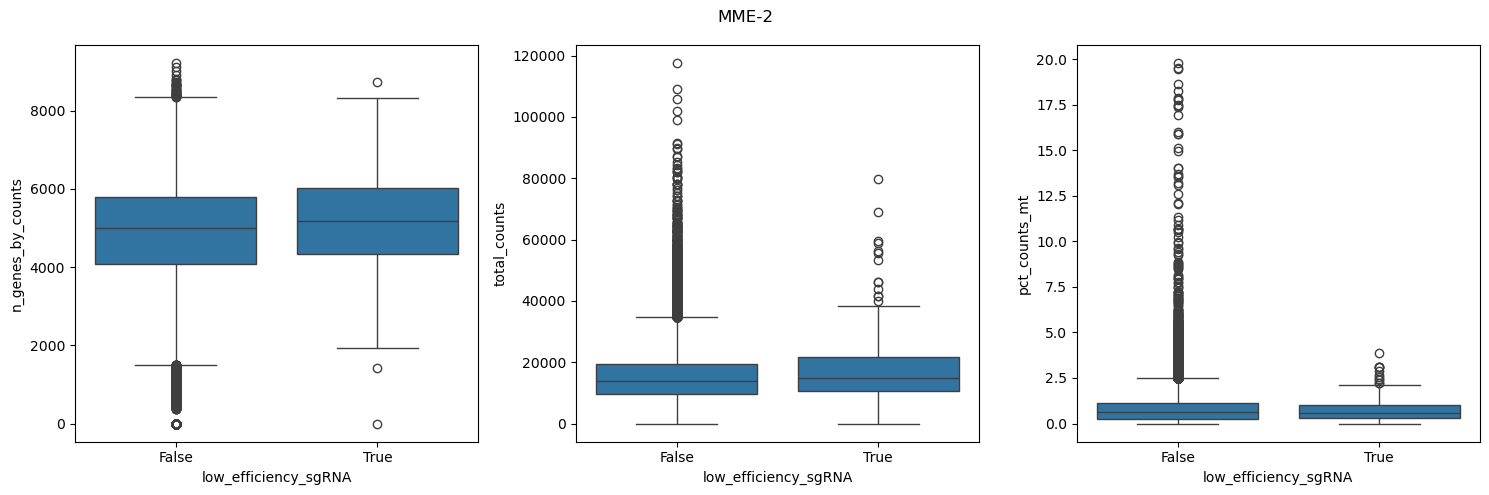

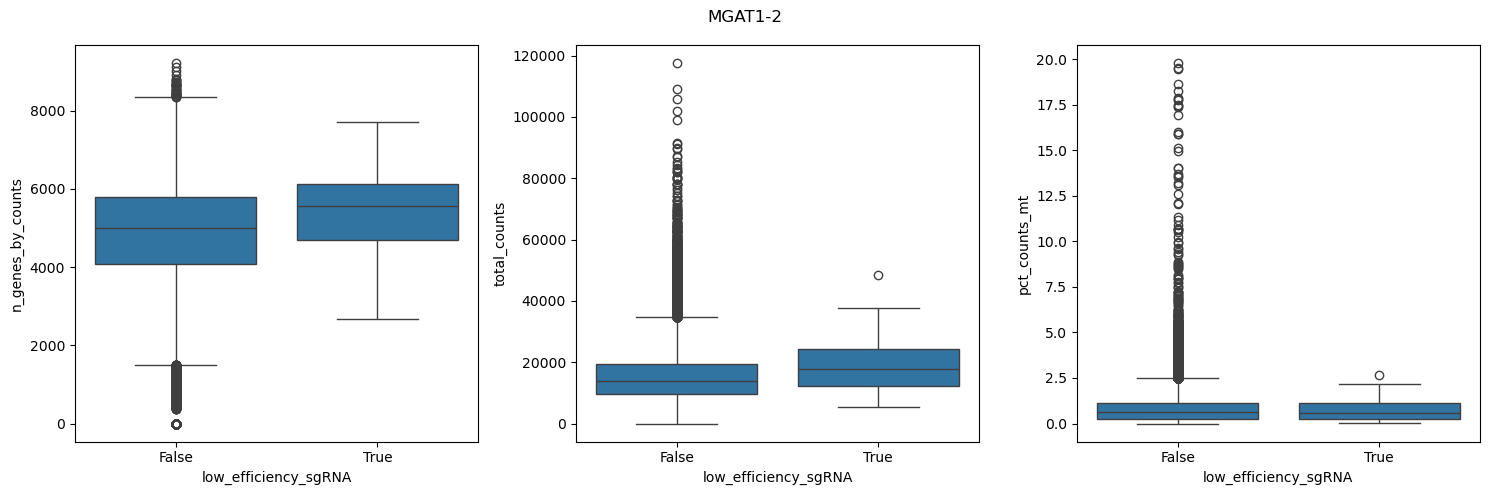

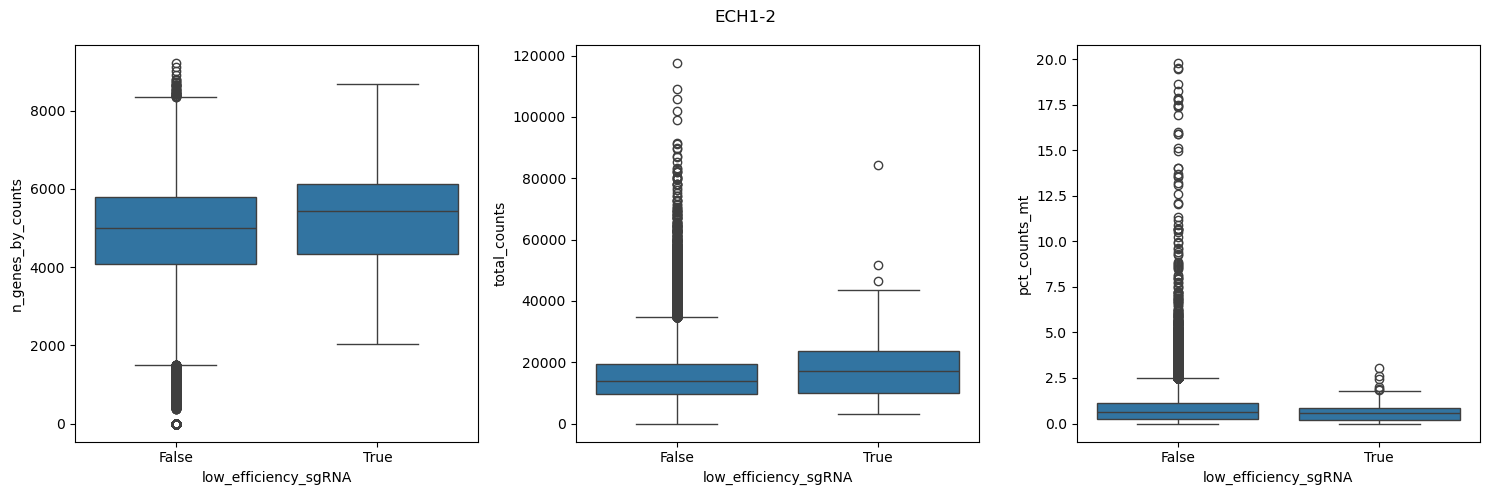

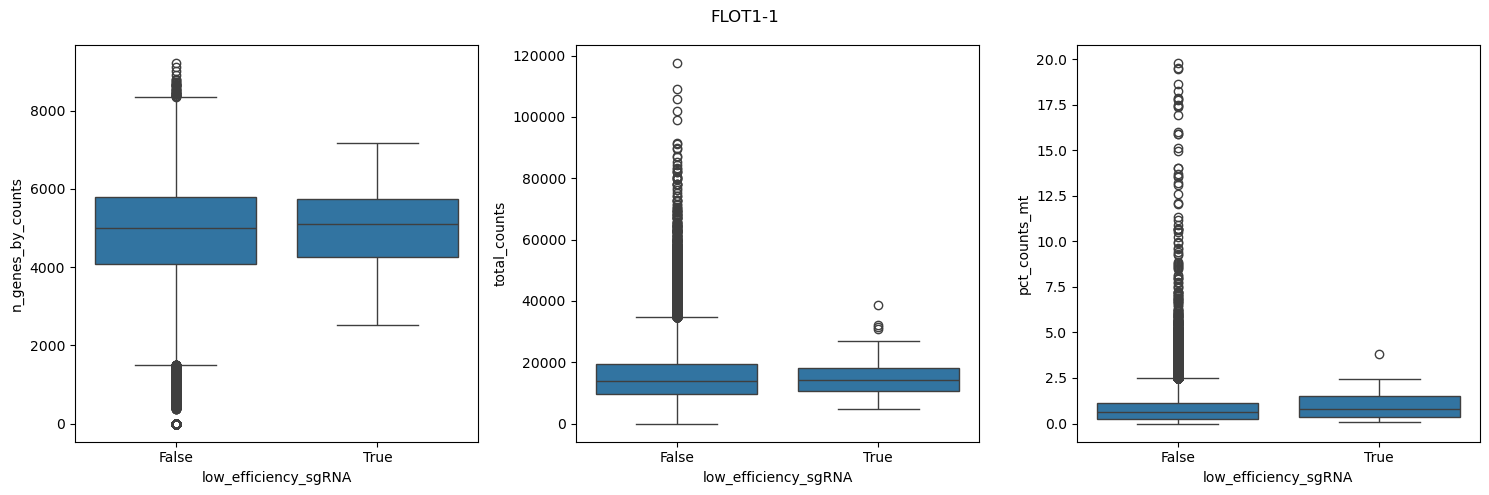

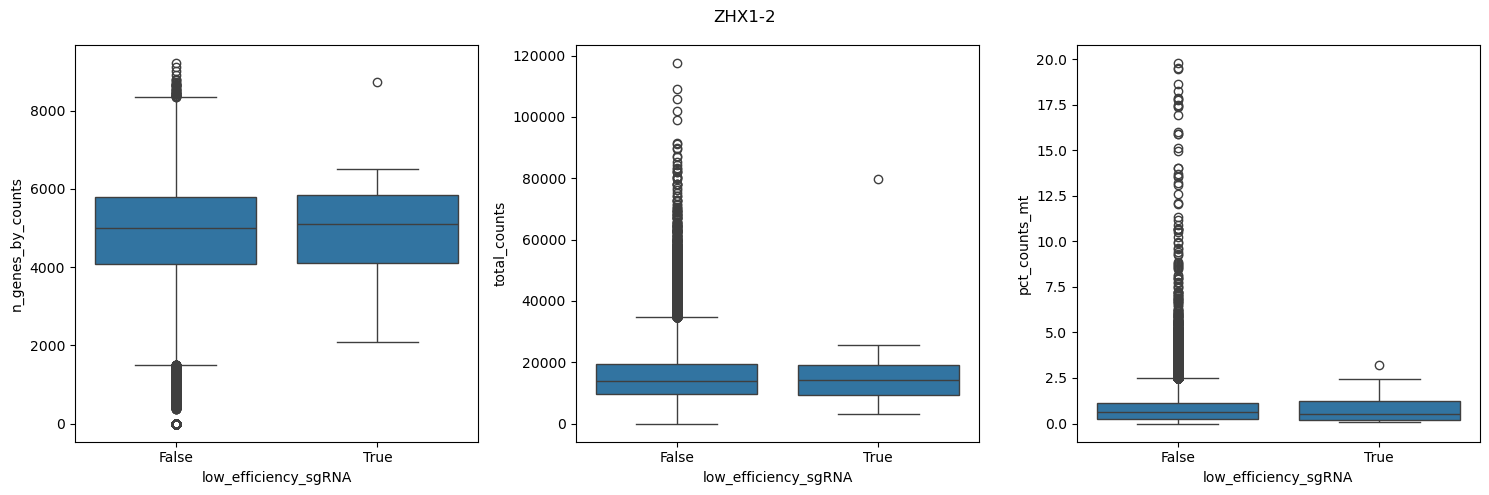

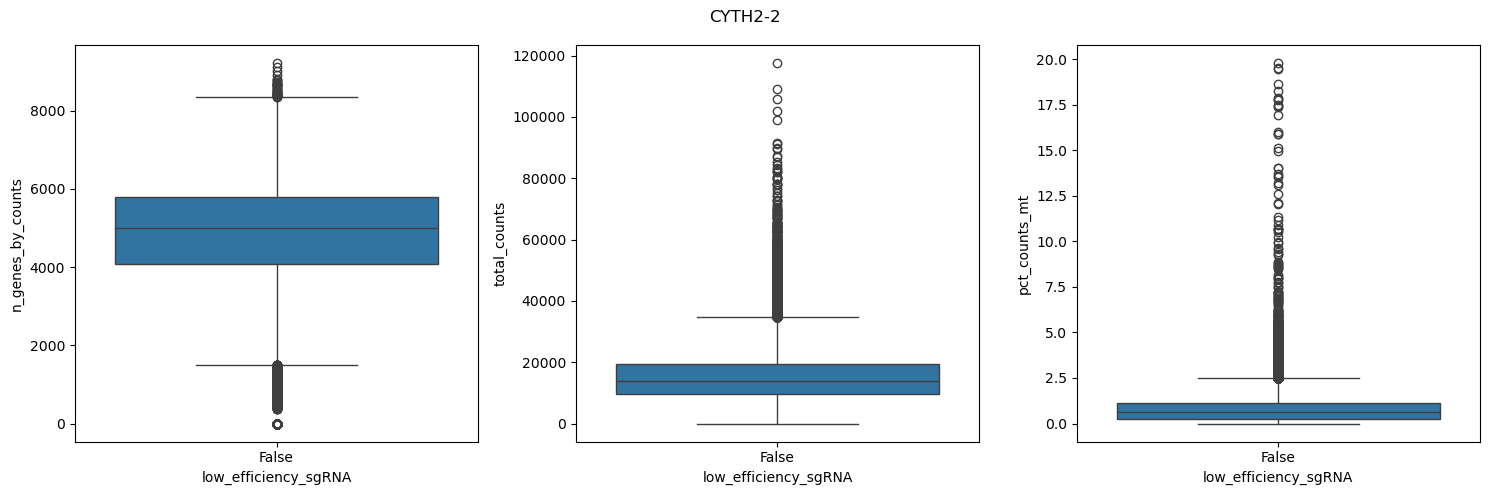

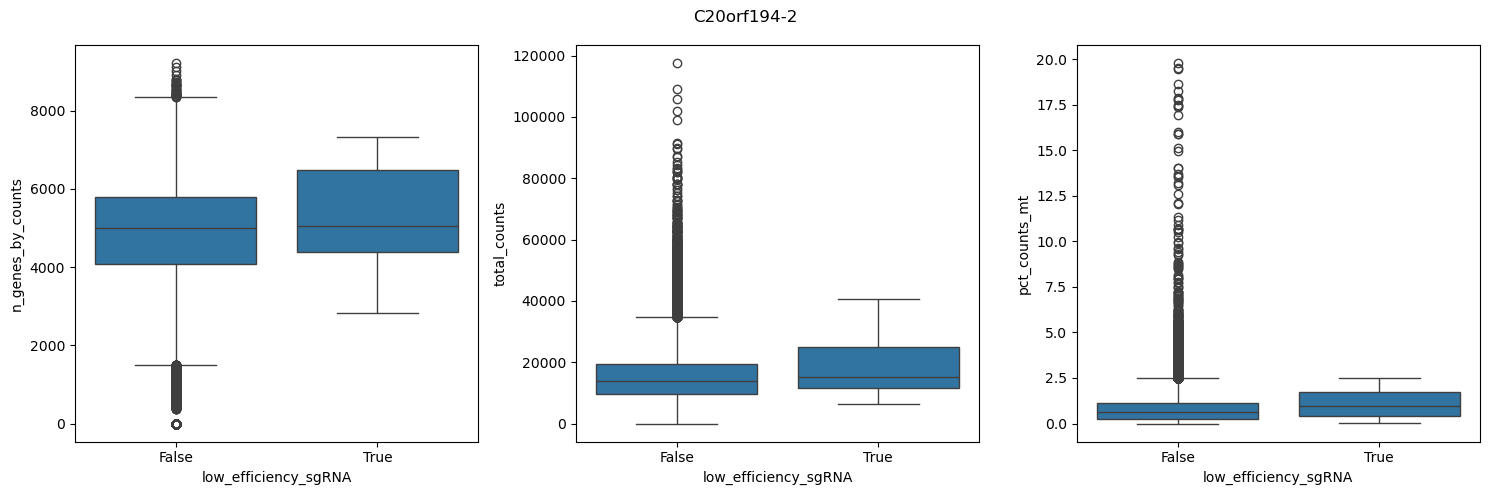

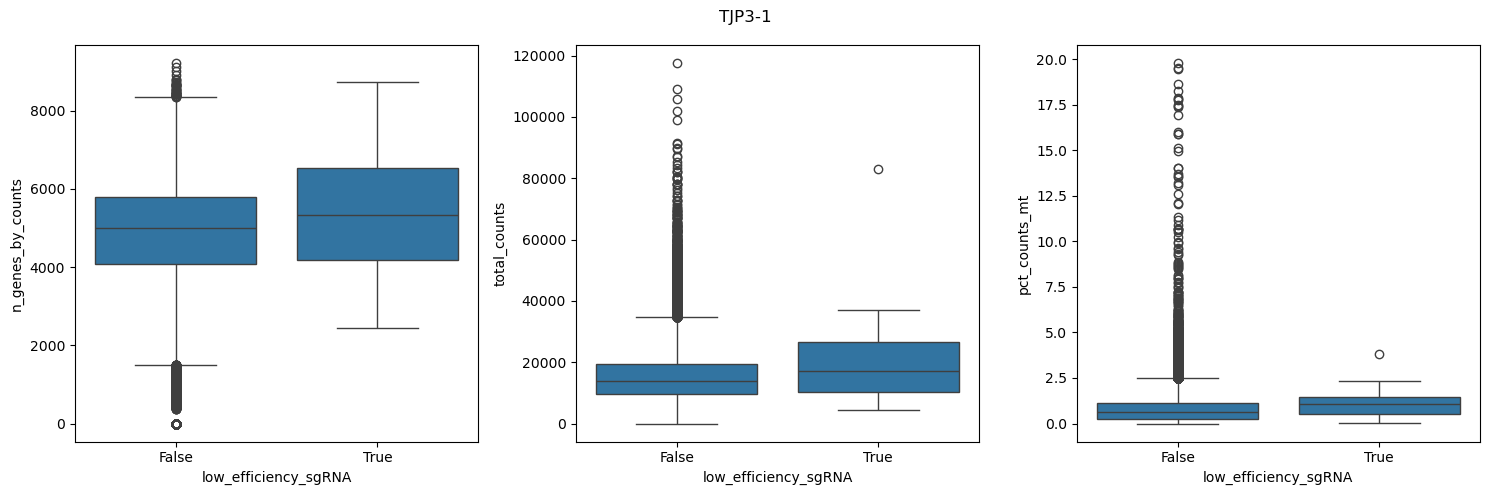

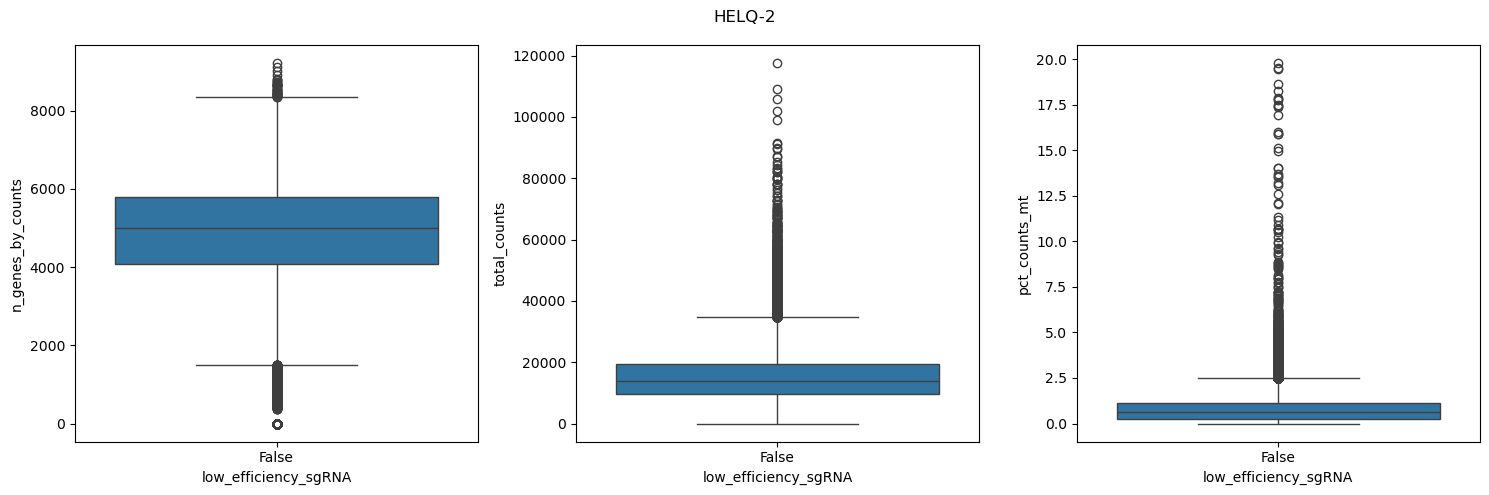

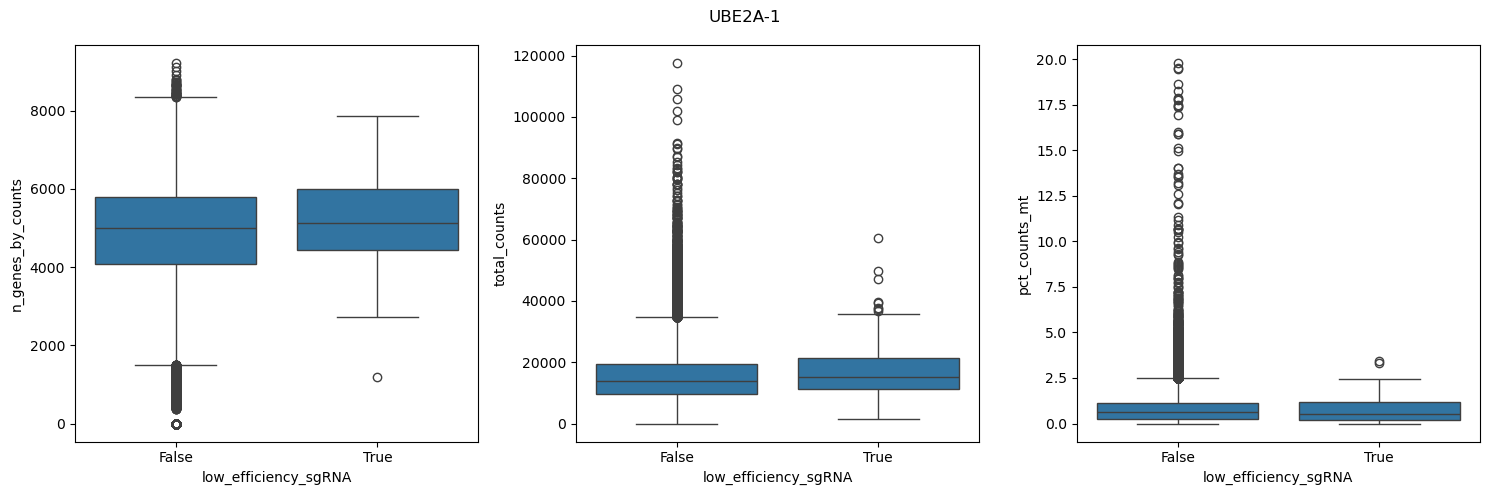

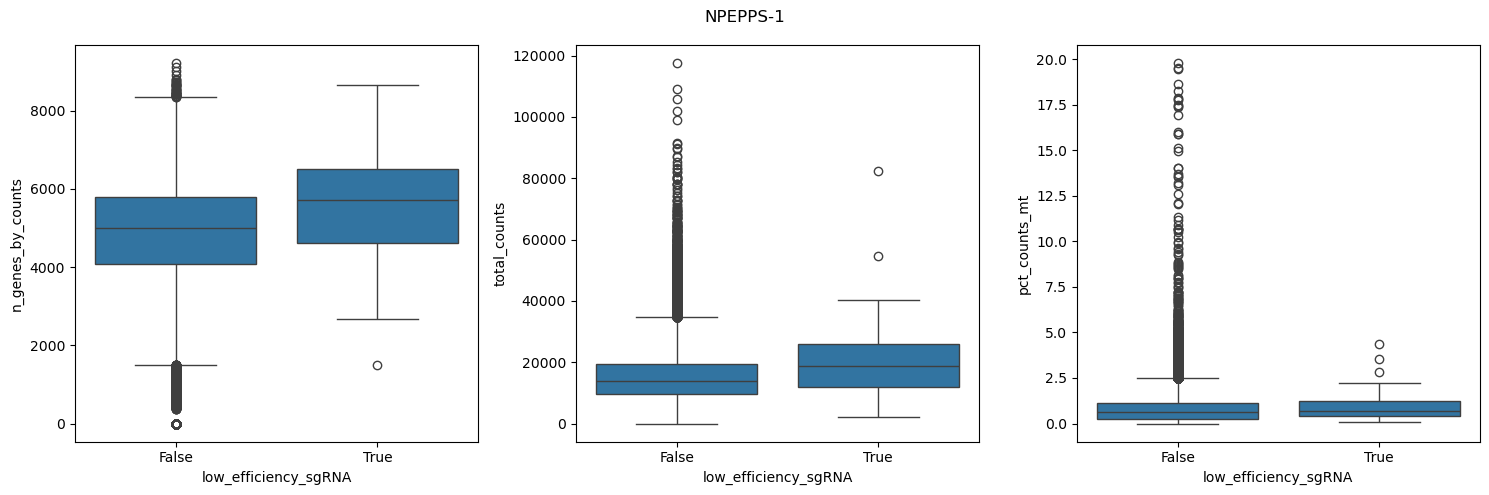

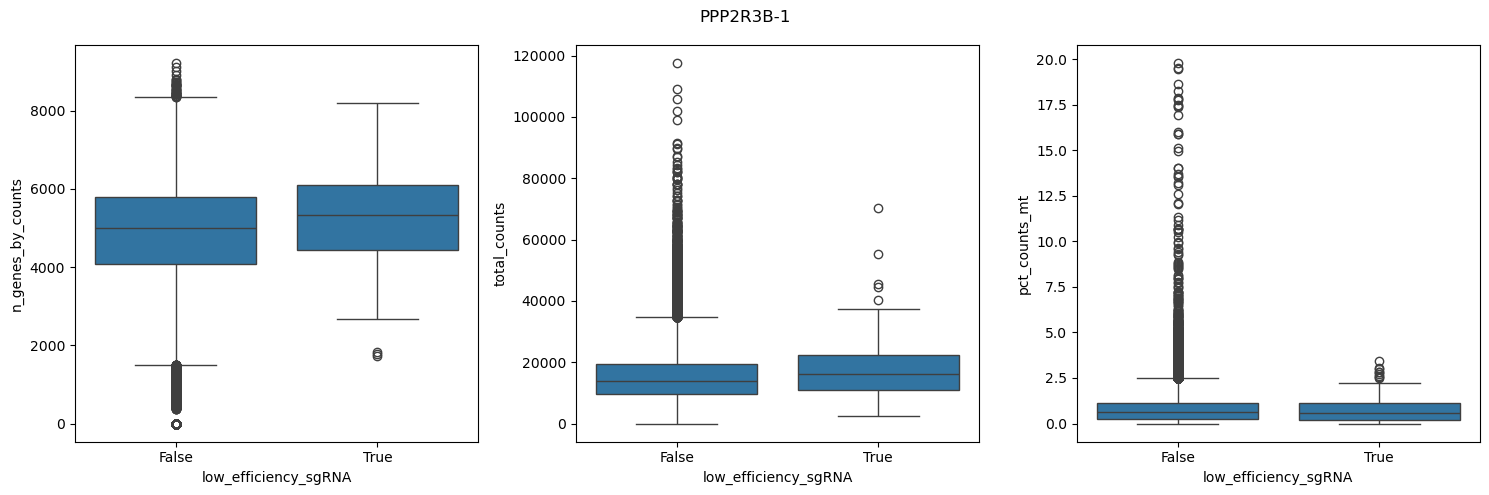

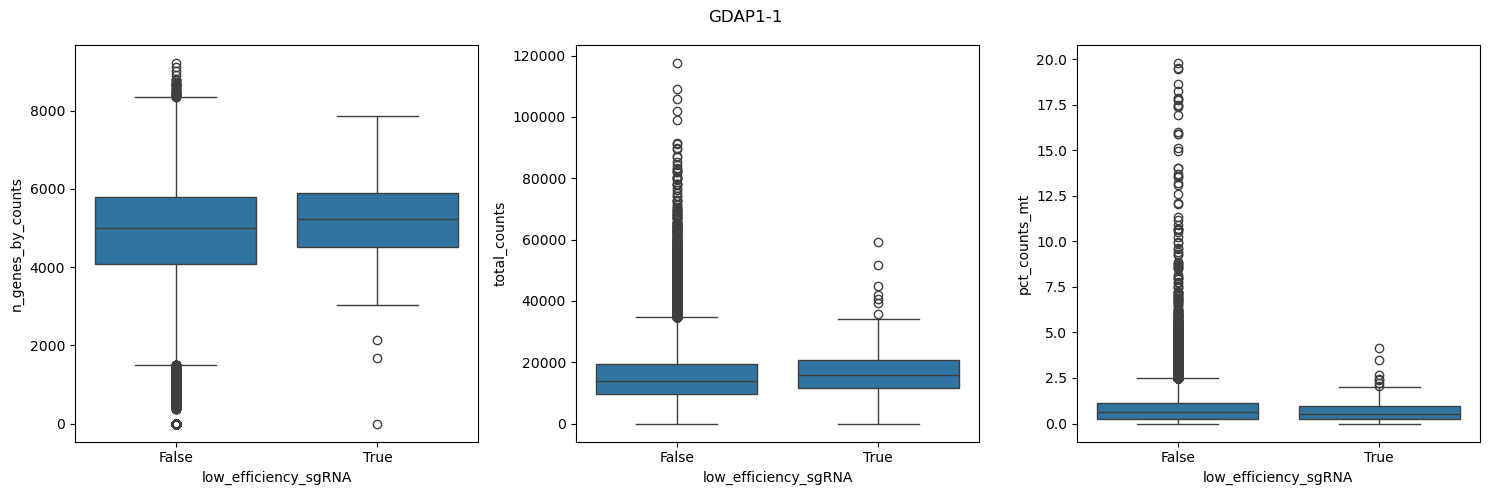

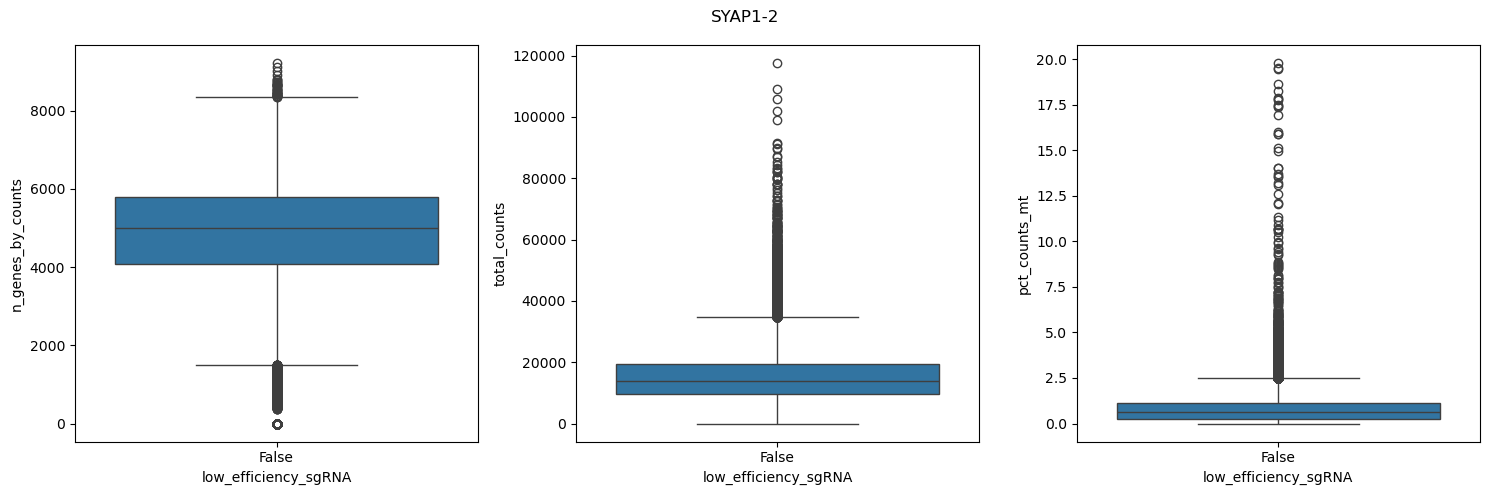

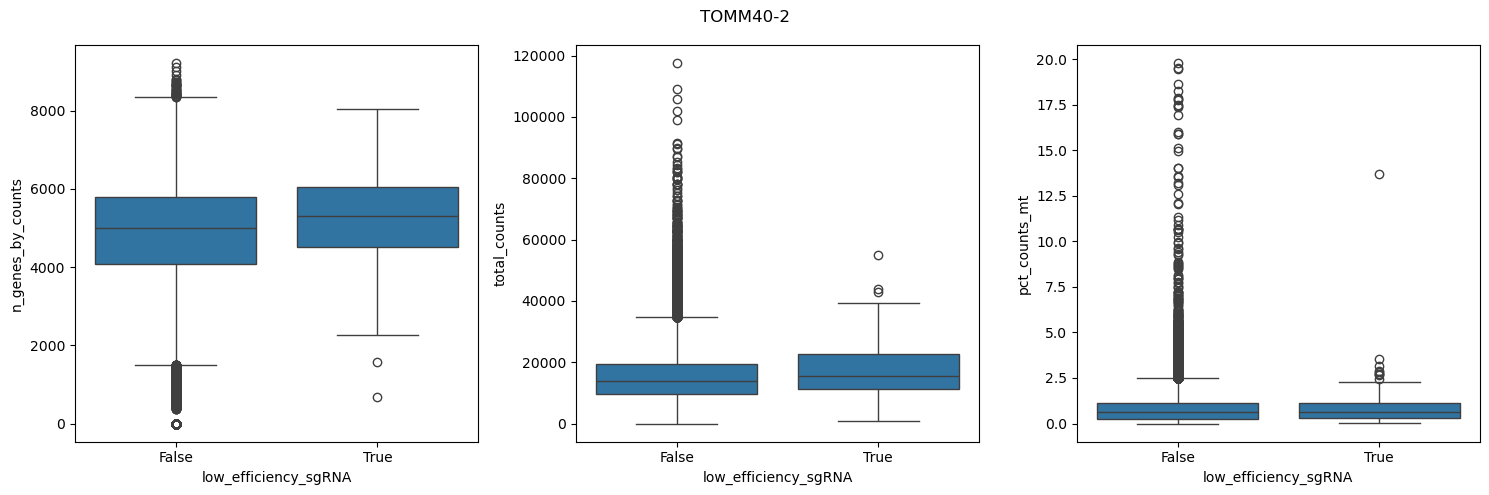

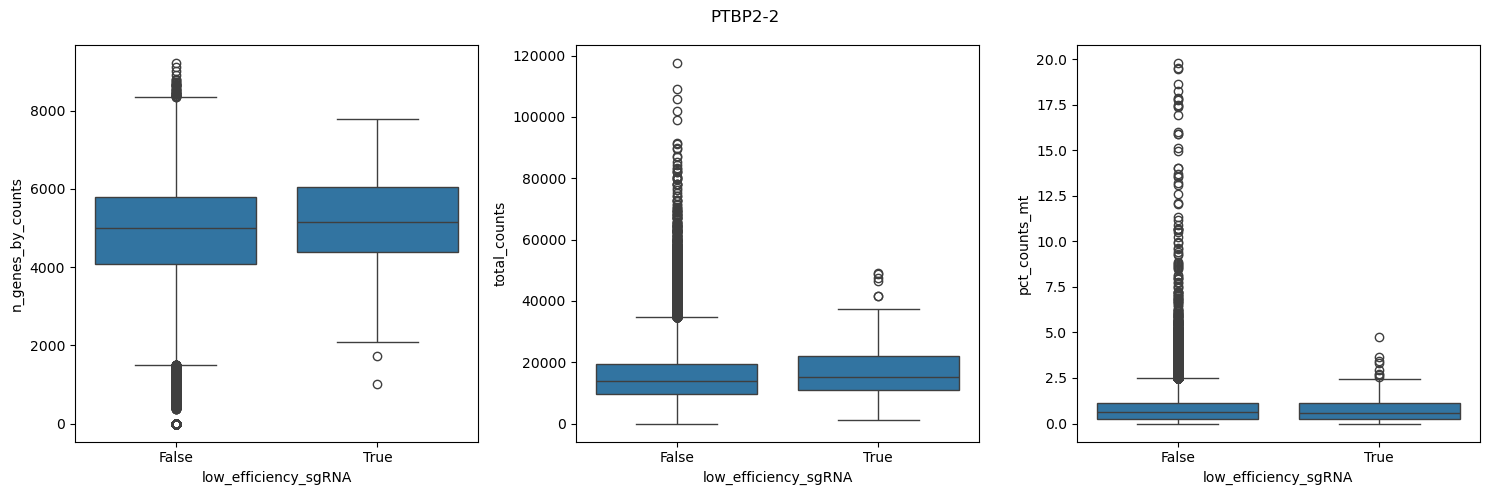

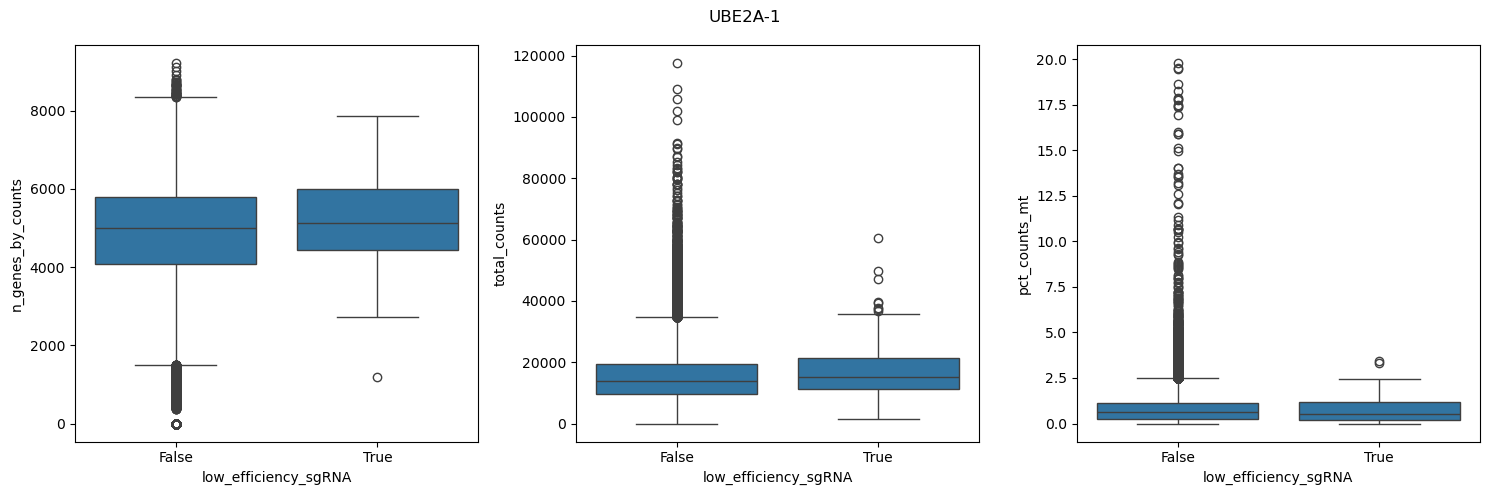

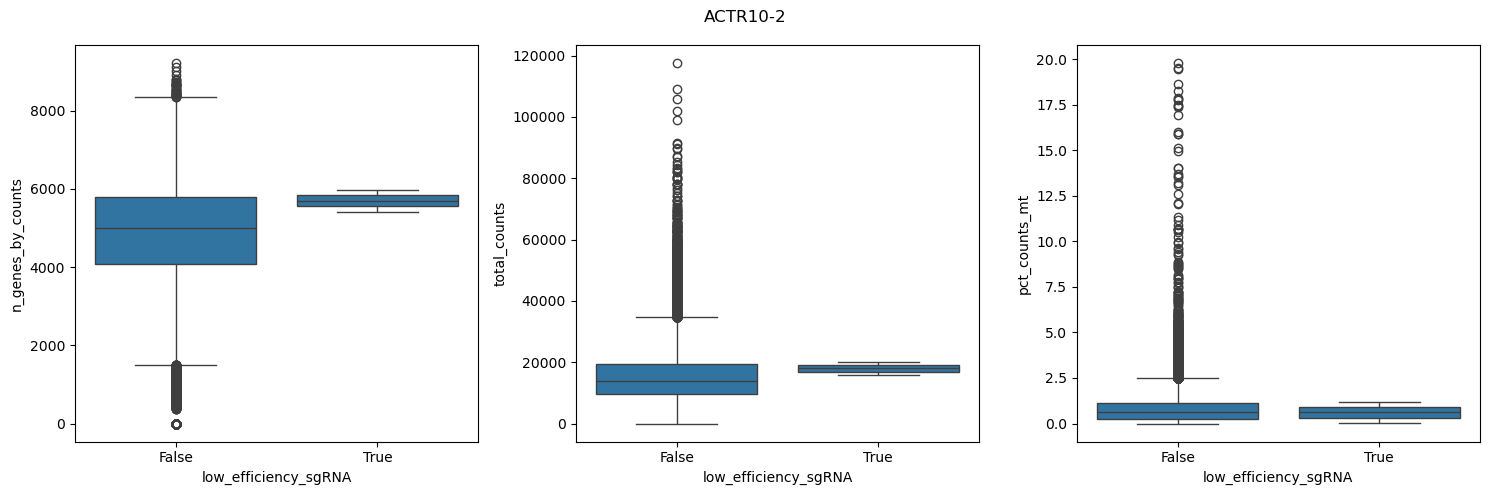

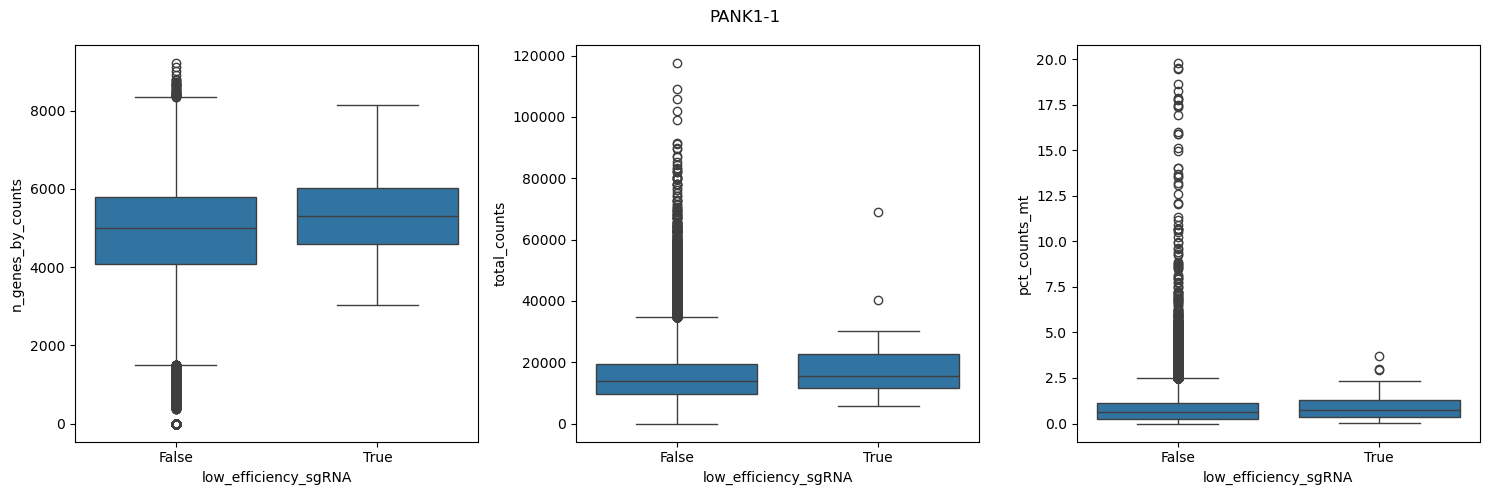

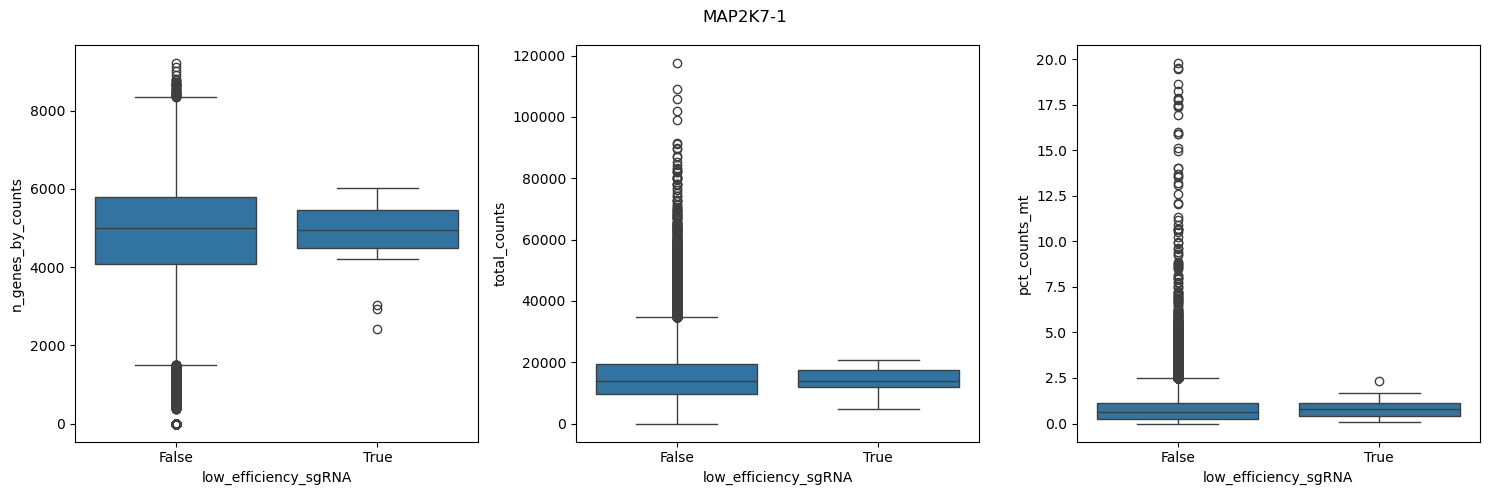

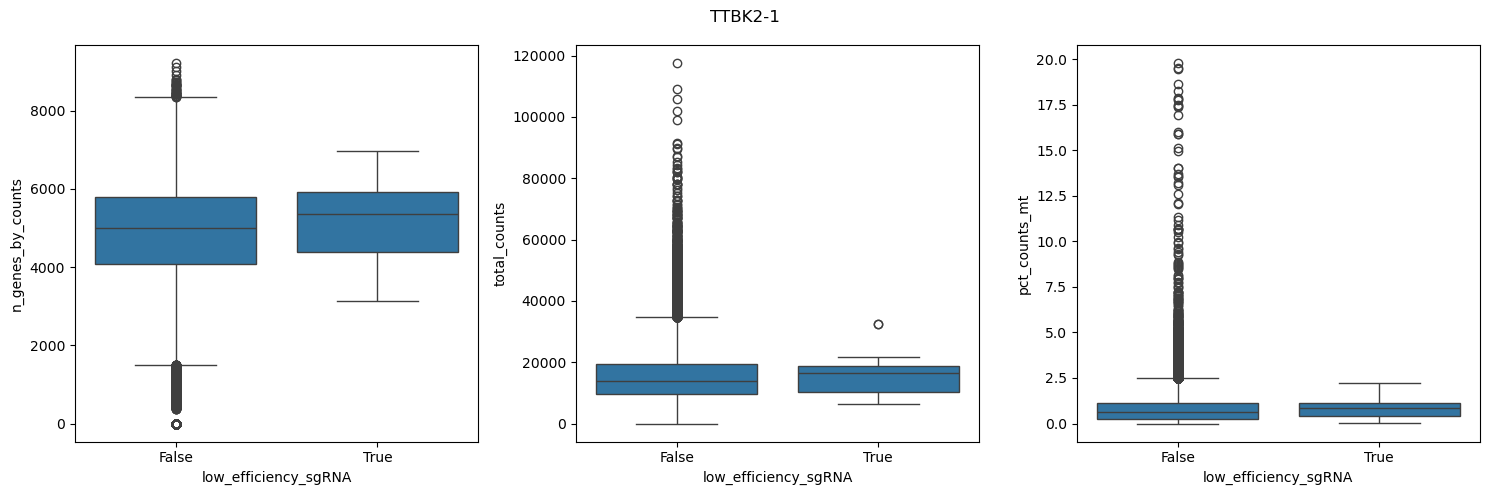

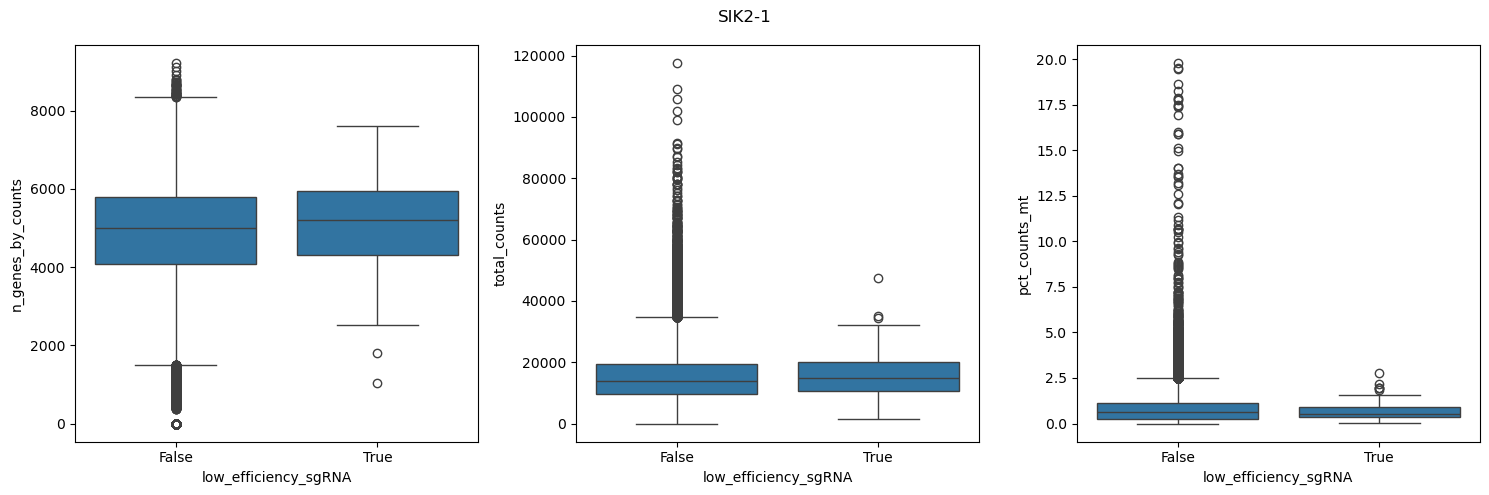

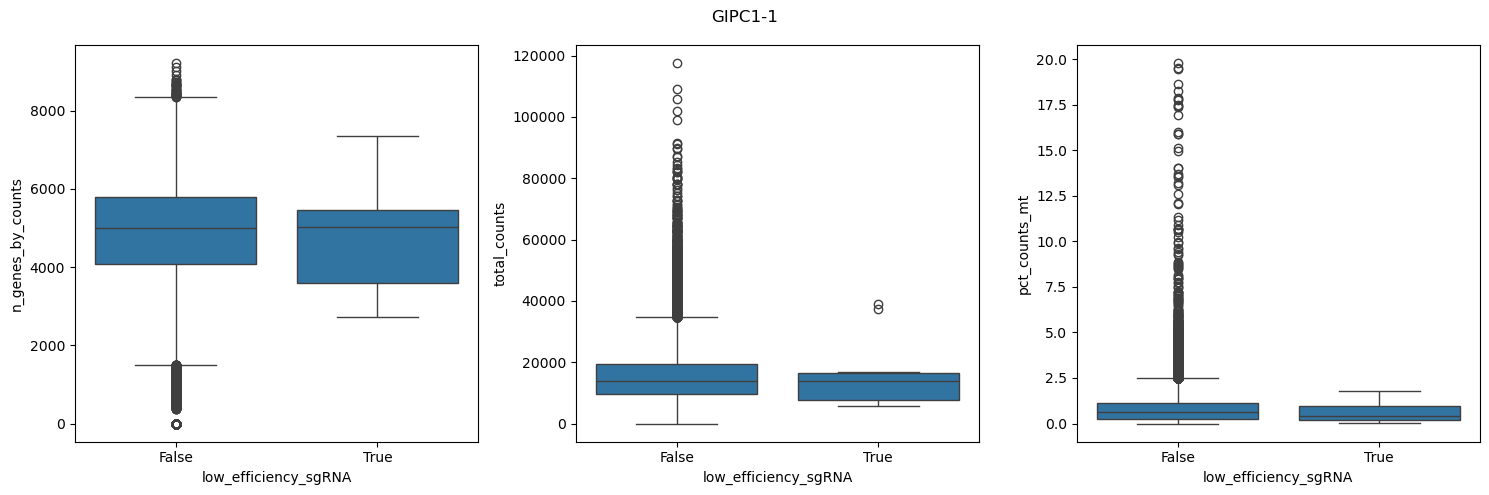

In [219]:
for i in np.arange(30):
    sgrna = np.random.choice(sgrna_blacklist)
    sgrna_qc['low_efficiency_sgRNA'] = sgrna_qc[sgrna] > 0
    # Create boxplot
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    sns.boxplot(data=sgrna_qc, x='low_efficiency_sgRNA', y='n_genes_by_counts', ax=ax1)
    sns.boxplot(data=sgrna_qc, x='low_efficiency_sgRNA', y='total_counts', ax=ax2)
    sns.boxplot(data=sgrna_qc, x='low_efficiency_sgRNA', y='pct_counts_mt', ax=ax3)

    fig.suptitle(sgrna)
    plt.tight_layout()
    plt.show()


In [83]:
all(a_ls[i1].var_names == a_ls[i2].var_names)

True

ARMC5-1         False
DDB1-1          False
FNDC10-1        False
RORC-1          False
SLC35F6-1       False
                ...  
ProbeNTC-764     True
ProbeNTC-765    False
ProbeNTC-766    False
ProbeNTC-767    False
ProbeNTC-768     True
Length: 27272, dtype: bool

In [41]:
X_mat[:, 10][X_mat[:, 10].nonzero()].mean() == compute_nonzero_means_v1(X_mat)[10]

True

In [18]:
a_ls = []
for f in h5_files:
    gex_a, crispr_a = _process_cellranger(f)
    a_ls.append(a)

In [10]:
adata = sc.read(f"{tmpdir}/{experiment_id}_merged.gex.h5ad")
adata.layers['counts'] = adata.X.copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
adata.var_names = adata.var['gene_name'].values

In [14]:
adata.obs['sgrna_type'] = 'targeting'
adata.obs['sgrna_type'] = np.where(adata.obs['sgrna_id'].str.startswith('NTC-'), 'NTC', adata.obs['sgrna_type'])
adata.obs['sgrna_type'] = np.where(adata.obs['sgrna_id'].str.startswith('ProbeNTC-'), 'ProbeNTC', adata.obs['sgrna_type'])
adata.obs.loc[adata.obs['sgrna_id'] == 'multi_sgrna','sgrna_type'] = np.nan
adata.obs['sgrna_type'].value_counts()

sgrna_type
targeting    140463
ProbeNTC      55643
NTC            5814
Name: count, dtype: int64

In [15]:
cytokines = ['IFNG',
             'IL4',
             'IL13',
             'IL5',
             'IL21',
             'IL10',
             'IL2',
             'TNF']

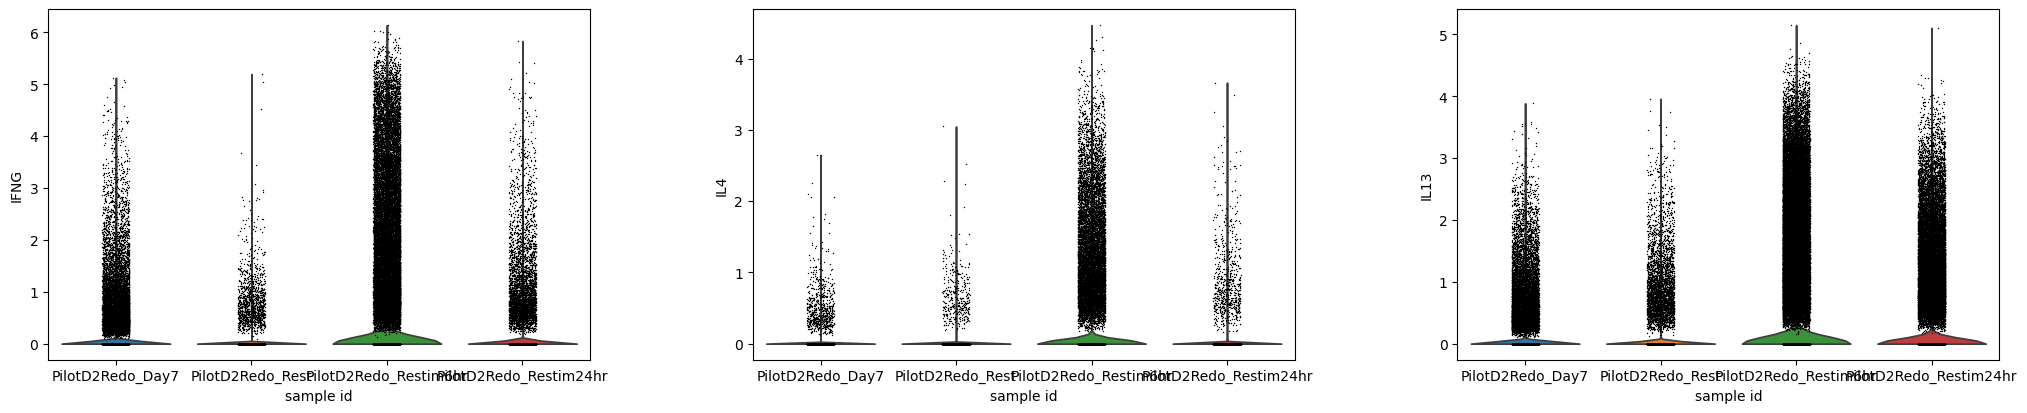

In [33]:
sc.pl.violin(adata, cytokines[0:3], groupby='sample_id')

In [44]:
from scipy import stats

In [76]:
adata[adata.obs['sgrna_umi_counts'] > 100]

View of AnnData object with n_obs × n_vars = 72659 × 18129
    obs: 'sample_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'sgrna_id', 'sgrna_umi_counts', 'batch', 'sgrna_type'
    var: 'gene_ids', 'feature_types', 'genome', 'gene_name', 'mt', 'n_cells_by_counts-0-0-0', 'mean_counts-0-0-0', 'log1p_mean_counts-0-0-0', 'pct_dropout_by_counts-0-0-0', 'total_counts-0-0-0', 'log1p_total_counts-0-0-0', 'n_cells_by_counts-1-0-0', 'mean_counts-1-0-0', 'log1p_mean_counts-1-0-0', 'pct_dropout_by_counts-1-0-0', 'total_counts-1-0-0', 'log1p_total_counts-1-0-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'log1p_mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'log1p_total_counts-1-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1'

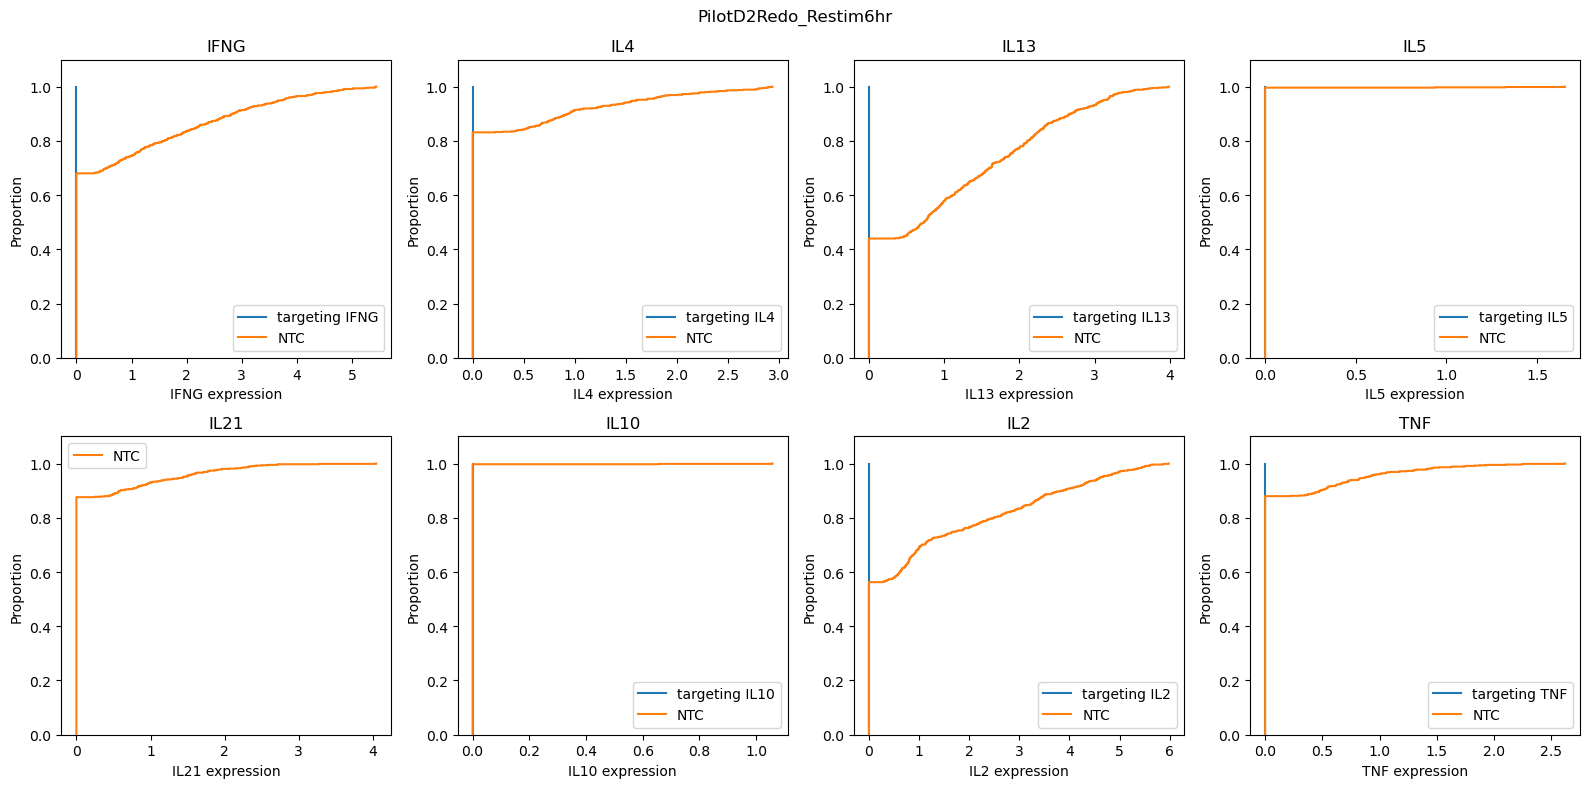

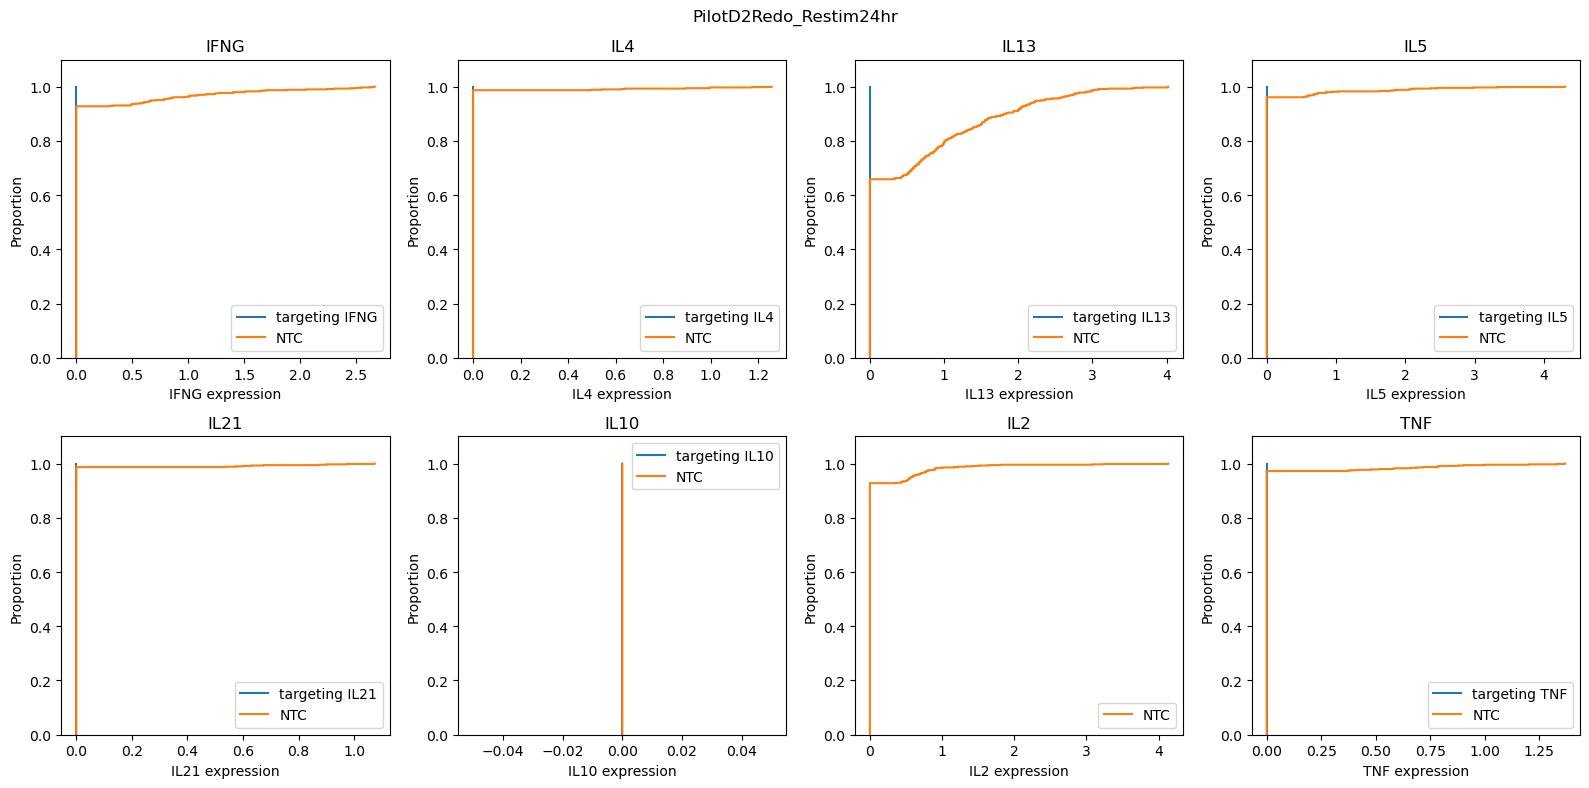

In [ ]:
cytokines_df = sc.get.obs_df(adata[adata.obs['sgrna_umi_counts'] > 100], ['sample_id', 'sgrna_type', 'sgrna_id'] + cytokines ).dropna()
for cond in ['PilotD2Redo_Restim6hr', 'PilotD2Redo_Restim24hr']:
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.flatten()

    for i, c in enumerate(cytokines):
        subset = cytokines_df[(cytokines_df['sample_id'] == cond) & ((cytokines_df['sgrna_type'] == 'NTC') | (cytokines_df['sgrna_id'].str.startswith(f'{c}-')))]
        # subset = subset[subset[c] > 0]
        sns.ecdfplot(data=subset[subset['sgrna_type']=='targeting'], x=c, label=f'targeting {c}', ax=axes[i])
        sns.ecdfplot(data=subset[subset['sgrna_type']=='NTC'], x=c, label='NTC', ax=axes[i])

        axes[i].legend()
        axes[i].set_ylim(0,1.1)
        axes[i].set_title(f'{c}')
        axes[i].set_xlabel(f'{c} expression')

    plt.suptitle(cond)
    plt.tight_layout()

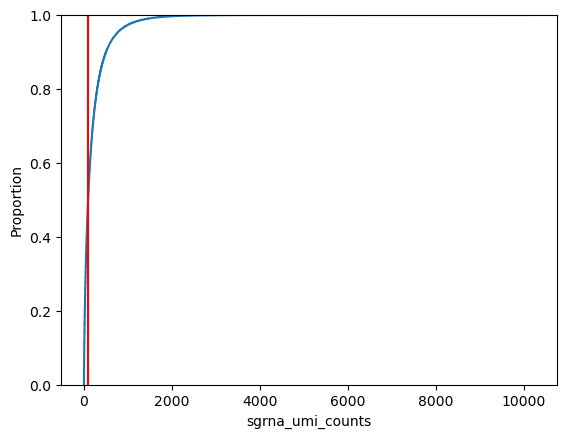

In [95]:

sns.ecdfplot(data=adata.obs, x='sgrna_umi_counts', label=f'targeting other');
plt.axvline(100, color='red')



In [100]:
adata.obs['sample_id'].unique()

['PilotD2Redo_Day7', 'PilotD2Redo_Rest', 'PilotD2Redo_Restim6hr', 'PilotD2Redo_Restim24hr']
Categories (4, object): ['PilotD2Redo_Day7', 'PilotD2Redo_Rest', 'PilotD2Redo_Restim6hr', 'PilotD2Redo_Restim24hr']

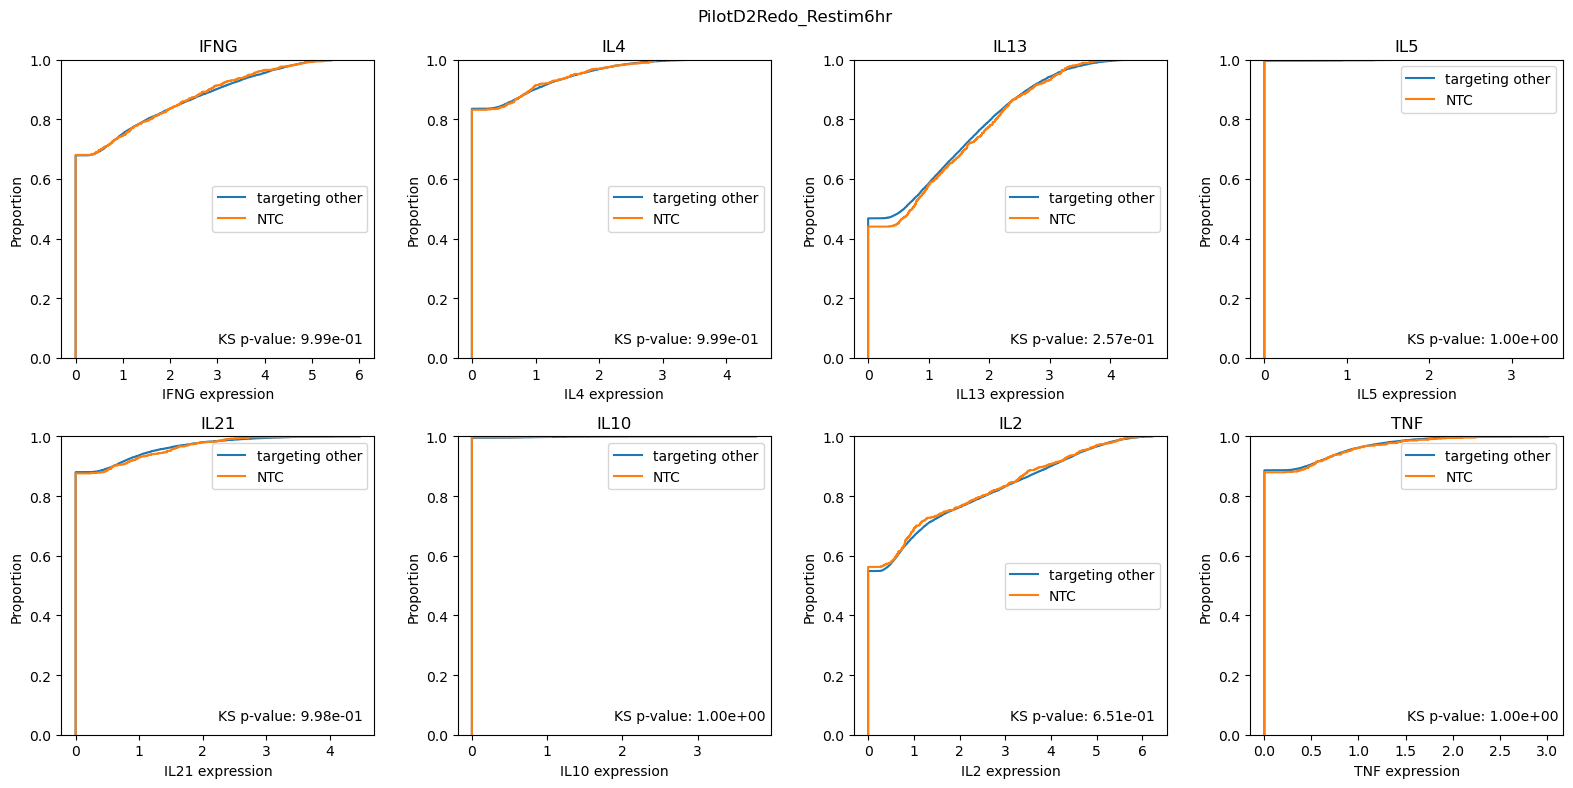

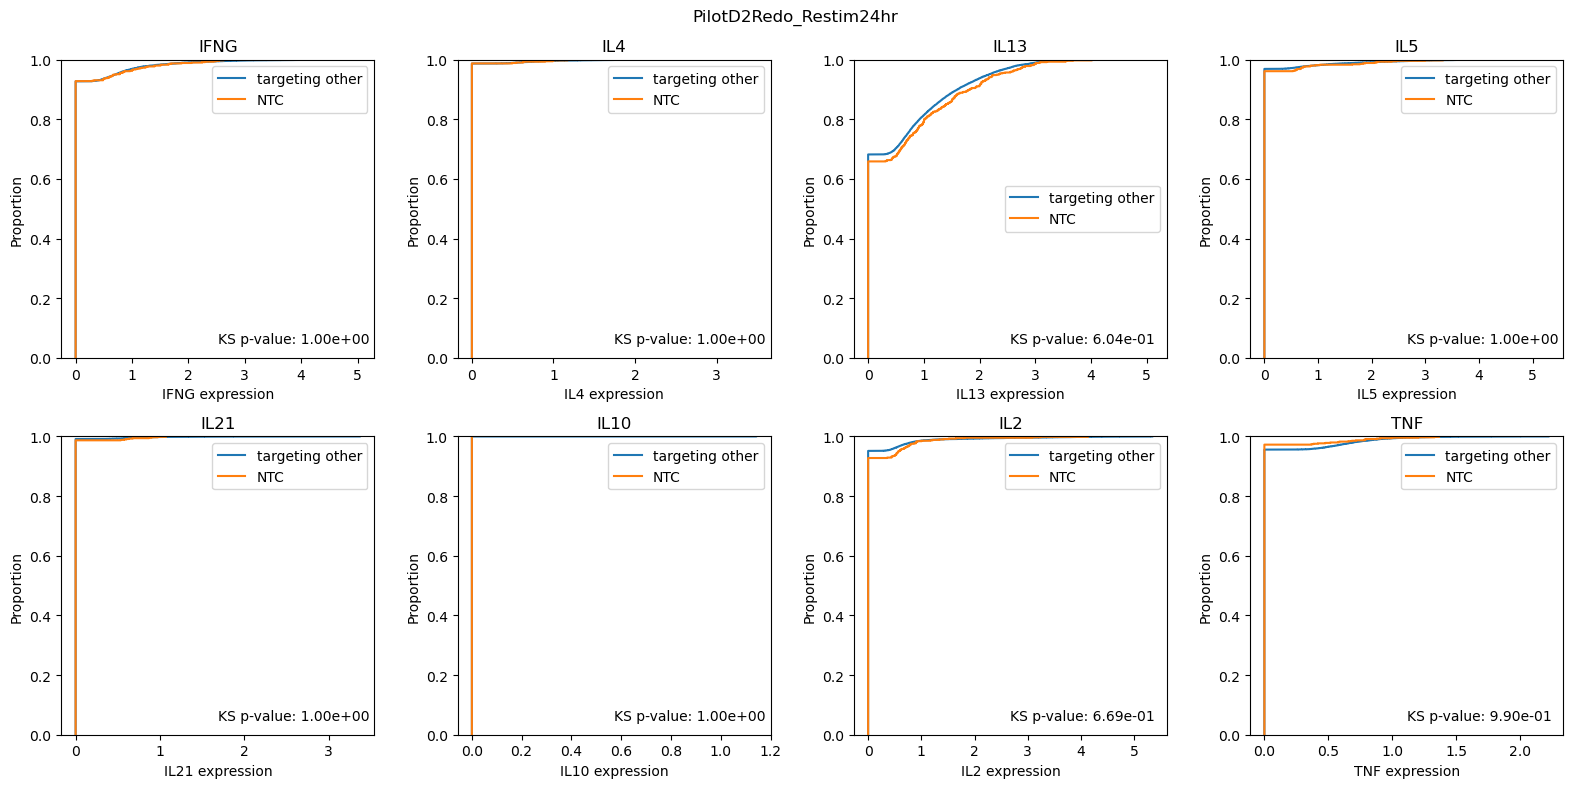

In [99]:
cytokines_df = sc.get.obs_df(adata[adata.obs['sgrna_umi_counts'] > 100], ['sample_id', 'sgrna_type', 'sgrna_id'] + cytokines ).dropna()
for cond in ['PilotD2Redo_Restim6hr', 'PilotD2Redo_Restim24hr']:
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.flatten()

    for i, c in enumerate(cytokines):
        subset = cytokines_df[(cytokines_df['sample_id'] == cond) & (~cytokines_df['sgrna_id'].str.startswith(f'{c}-'))]
        # subset = subset[subset[c] > 0]
        sns.ecdfplot(data=subset[subset['sgrna_type']=='targeting'], x=c, label=f'targeting other', ax=axes[i])
        sns.ecdfplot(data=subset[subset['sgrna_type']=='NTC'], x=c, label='NTC', ax=axes[i])
        # Perform KS test between targeting and NTC distributions
        targeting_dist = subset[subset['sgrna_type']=='targeting'][c].values
        ntc_dist = subset[subset['sgrna_type']=='NTC'][c].values
        ks_stat, p_val = stats.ks_2samp(targeting_dist, ntc_dist)
        axes[i].text(0.5, 0.05, f'KS p-value: {p_val:.2e}', 
                    transform=axes[i].transAxes)
        axes[i].legend()
        axes[i].set_title(f'{c}')
        axes[i].set_xlabel(f'{c} expression')

    plt.suptitle(cond)
    plt.tight_layout()

Text(0, 0.5, 'IL4 expression')

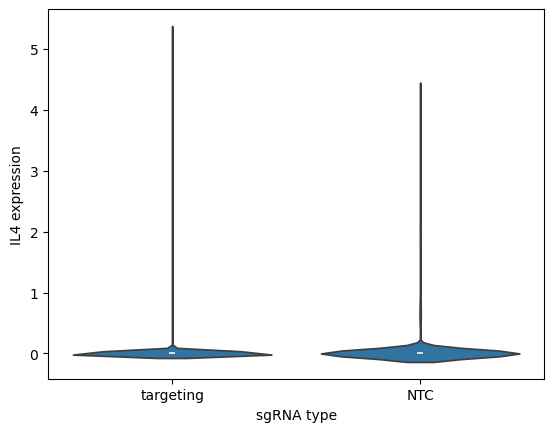

In [49]:
sns.violinplot(data=subset, x='sgrna_type', y='IL5', order=['targeting', 'NTC'], scale='width');
plt.xlabel('sgRNA type')
plt.ylabel('IL4 expression')

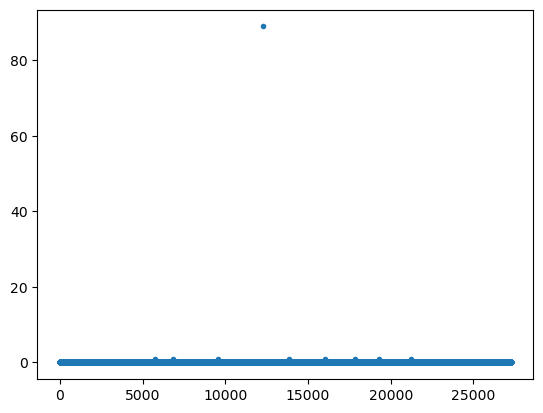

In [181]:
plt.plot(crispr_a[1400].X.toarray().flatten(), '.')

In [182]:
import crispat

In [184]:



# perturb_metadata['perturbed_gene_name'][~perturb_metadata['gene_ids'].str.split('-', expand=True)[2].isna()]


perturbed_gene_name      guide_id  n_cells  total_counts
ARMC5-1                    ARMC5       ARMC5-1       22        1291.0
DDB1-1                      DDB1        DDB1-1        0           0.0
FNDC10-1                  FNDC10      FNDC10-1        5          21.0
RORC-1                      RORC        RORC-1        1           1.0
SLC35F6-1                SLC35F6     SLC35F6-1       11          12.0
...                          ...           ...      ...           ...
ProbeNTC-764            ProbeNTC  ProbeNTC-764        0           0.0
ProbeNTC-765            ProbeNTC  ProbeNTC-765        2           2.0
ProbeNTC-766            ProbeNTC  ProbeNTC-766        3           3.0
ProbeNTC-767            ProbeNTC  ProbeNTC-767        2           2.0
ProbeNTC-768            ProbeNTC  ProbeNTC-768        0           0.0

[27272 rows x 4 columns]

In [185]:
# Get sorted counts in descending order
sorted_counts = np.sort(crispr_a.X.toarray(), axis=1)[:,::-1]
crispr_a.obs['max_sgrna_counts'] = sorted_counts[:,0]
# Compute difference between max and second highest
crispr_a.obs['max_delta_sgrna_counts'] = sorted_counts[:,0] - sorted_counts[:,1]

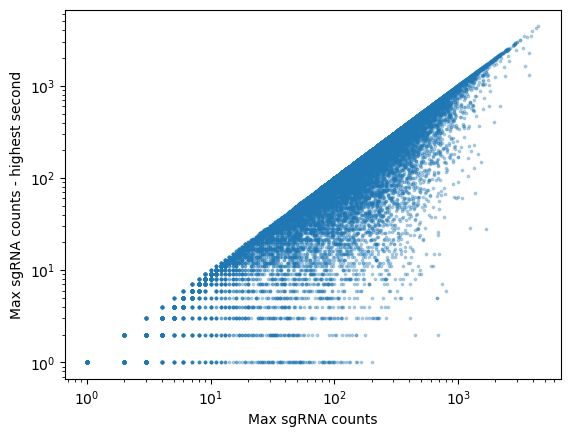

In [186]:
plt.scatter(crispr_a.obs['max_sgrna_counts'], crispr_a.obs['max_delta_sgrna_counts'], s=3, alpha=0.3);
plt.xlabel('Max sgRNA counts');
plt.ylabel('Max sgRNA counts - highest second');
plt.xscale('log');plt.yscale('log');

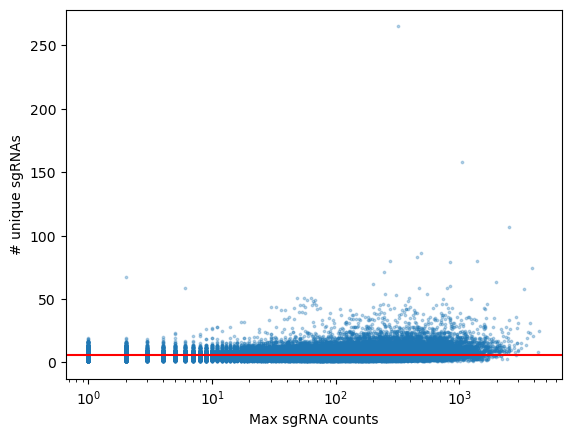

In [187]:
plt.scatter(crispr_a.obs['max_sgrna_counts'], crispr_a.obs['n_genes_by_counts'], s=3, alpha=0.3);
plt.axhline(crispr_a.obs['n_genes_by_counts'].median(), color='red');
plt.xlabel('Max sgRNA counts');
plt.ylabel('# unique sgRNAs');
plt.xscale('log')

In [188]:
def ga_umi(adata_crispr, threshold = 3):   
    '''
    Guide assignment with fixed UMI thresholds 
    
    Args:
        input_file (str): path to the stored anndata object with the gRNA counts
        thresholds (list): list of integers to use as thresholds (create assignment output file for each t in the list)
        output_dir (str): directory in which to store the resulting assignment
        
    Returns:
        None
    '''
    gRNA_list = adata_crispr.var_names.tolist()

    # Get perturbed cells for each gRNA based on a fixed UMI threshold
    perturbations = pd.DataFrame({'cell': [], 'gRNA': []})
    print('Get perturbed cells for each gRNA with UMI threshold = ' + str(threshold))
    for gRNA in gRNA_list:
        # Get cells with UMI counts higher than the threshold for specified gRNA
        selected_guide = adata_crispr[:,[gRNA]].X
        perturbed_cells = adata_crispr.obs_names[selected_guide.toarray().reshape(-1) >= threshold].tolist()
        UMI_counts = adata_crispr[selected_guide.toarray().reshape(-1) >= threshold, [gRNA]].X.toarray().reshape(-1)
        
        if len(perturbed_cells) != 0:
            df = pd.DataFrame({'cell': perturbed_cells, 'gRNA': gRNA, 'UMI_counts': UMI_counts})
            perturbations = pd.concat([perturbations, df], ignore_index = True)
    return(perturbations)

In [263]:
# Guide assignment with UMI thresholds
perts_assignment = ga_umi(crispr_a, 5)

Get perturbed cells for each gRNA with UMI threshold = 5


In [265]:
perts_assignment['perturbed_gene_name'] = perts_assignment['gRNA'].str.split('-').str[:-1].str.join('-')

In [268]:
if 'n_sgrnas' in crispr_a.obs:
    crispr_a.obs.drop('n_sgrnas',axis=1, inplace=True)
crispr_a.obs = pd.concat([crispr_a.obs, perts_assignment['cell'].value_counts()], axis=1)
crispr_a.obs = crispr_a.obs.rename({'count':'n_sgrnas'}, axis=1)

crispr_a.obs['n_sgrnas'] = crispr_a.obs['n_sgrnas'].fillna(0)

In [273]:
if 'n_perturbed_genes' in crispr_a.obs:
    crispr_a.obs.drop('n_perturbed_genes',axis=1, inplace=True)
crispr_a.obs = pd.concat([crispr_a.obs, perts_assignment[['cell', 'perturbed_gene_name']].drop_duplicates().groupby('cell').count()], axis=1)
crispr_a.obs = crispr_a.obs.rename({'perturbed_gene_name':'n_perturbed_genes'}, axis=1)

crispr_a.obs['n_perturbed_genes'] = crispr_a.obs['n_perturbed_genes'].fillna(0)

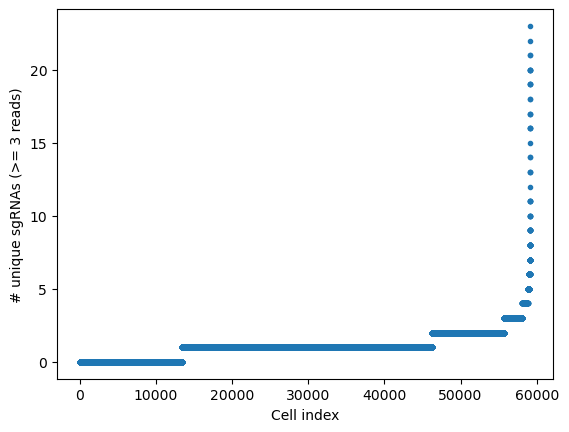

In [274]:
plt.plot(crispr_a.obs['n_sgrnas'].sort_values().values, '.');
plt.xlabel('Cell index');
plt.ylabel('# unique sgRNAs (>= 3 reads)');
# crispr_a.obs['n_sgrnas'].values

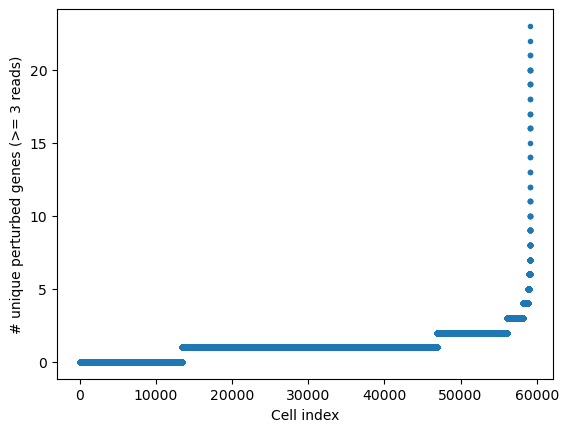

In [275]:
plt.plot(crispr_a.obs['n_perturbed_genes'].sort_values().values, '.');
plt.xlabel('Cell index');
plt.ylabel('# unique perturbed genes (>= 3 reads)');

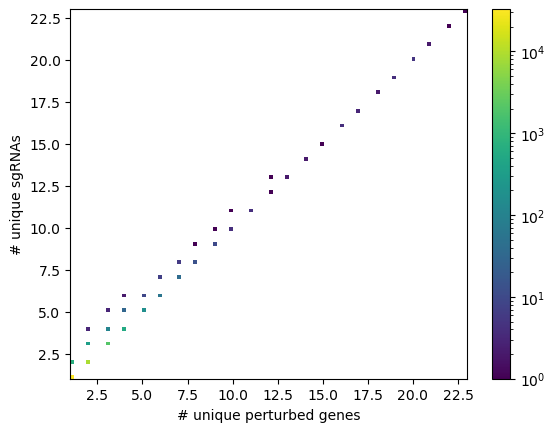

In [276]:
pl_df = crispr_a.obs[crispr_a.obs['n_sgrnas'] > 0].copy()
plt.hist2d(pl_df['n_perturbed_genes'], pl_df['n_sgrnas'], 
           norm=matplotlib.colors.LogNorm(), bins=100);
plt.colorbar();
plt.xlabel('# unique perturbed genes');
plt.ylabel('# unique sgRNAs');

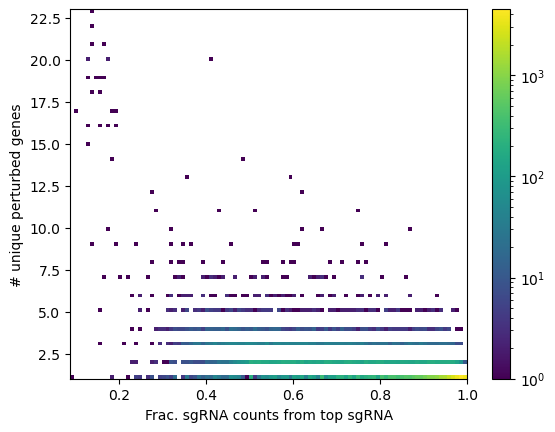

In [278]:
pl_df = crispr_a.obs[crispr_a.obs['n_sgrnas'] > 0].copy()
plt.hist2d(pl_df['max_sgrna_counts']/pl_df['total_counts'], pl_df['n_perturbed_genes'], 
           norm=matplotlib.colors.LogNorm(), bins=100);
plt.colorbar();
plt.xlabel('Frac. sgRNA counts from top sgRNA');
plt.ylabel('# unique perturbed genes');
# plt.xscale('log'); 

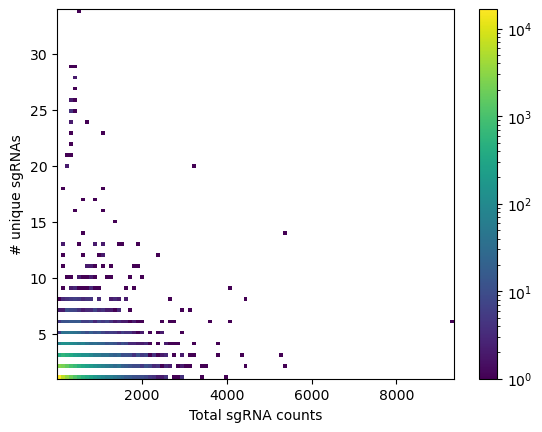

In [214]:
pl_df = crispr_a.obs[crispr_a.obs['n_sgrnas'] > 0].copy()
plt.hist2d(pl_df['max_sgrna_counts']/pl_df['total_counts'], pl_df['n_perturbed_genes'], 
           norm=matplotlib.colors.LogNorm(), bins=100);
plt.colorbar();
plt.xlabel('Frac. sgRNA counts from top sgRNA');
plt.ylabel('# unique sgRNAs');
# plt.xscale('log'); 